<a href="https://colab.research.google.com/github/ManasNM/Bike_sharing_demand_prediction/blob/main/2_Manas_Nayan_Mukherjee_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b> 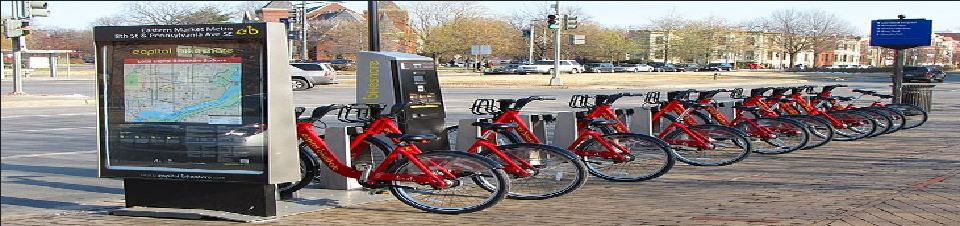

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Importing Libraries

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting max display column limit to 20
pd.set_option("display.max_columns", 20)

#set style
plt.style.use('seaborn')


# Setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

# Mounting drive

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CSV file loaction path


In [3]:
file_path= '/content/SeoulBikeData.csv'

# Reading CSV file


In [4]:
Bikeshare_df=pd.read_csv(file_path,encoding="latin")

#**Data Exploration And Data Cleaning**

In [5]:
# Check 1st Ten rows
Bikeshare_df.head(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   
5  01/12/2017                100     5             -6.4           37   
6  01/12/2017                181     6             -6.6           35   
7  01/12/2017                460     7             -7.4           38   
8  01/12/2017                930     8             -7.6           37   
9  01/12/2017                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   
7               0.9              2000                      -19.3   
8               1.1              2000                      -19.8   
9               0.5              1928                      -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

In [6]:
# Check last Ten rows
Bikeshare_df.tail(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8750  30/11/2018                761    14              7.8           20   
8751  30/11/2018                768    15              7.0           20   
8752  30/11/2018                837    16              7.2           23   
8753  30/11/2018               1047    17              6.0           29   
8754  30/11/2018               1384    18              4.7           34   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8750               2.2              2000                      -13.8   
8751               3.3              1994                      -14.4   
8752               1.5              1945                      -12.6   
8753               2.1              1877                      -10.7   
8754               1.9              1661                       -9.8   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8750                     1.67           0.0            0.0  Autumn   
8751                     1.21           0.0            0.0  Autumn   
8752                     0.72           0.0            0.0  Autumn   
8753                     0.23           0.0            0.0  Autumn   
8754                     0.00           0.0            0.0  Autumn   
8755                     0.00           0.0            0.0  Autumn   
8756                     0.00           0.0            0.0  Autumn   
8757                     0.00           0.0            0.0  Autumn   
8758                     0.00           0.0            0.0  Autumn   
8759                     0.00           0.0            0.0  Autumn   

         Holiday Functioning Day  
8750  No Holiday             Yes  
8751  No Holiday             Yes  
8752  No Holiday             Yes  
8753  No Holiday             Yes  
8754  No Holiday             Yes  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [7]:
# Check Total rows and Columns in dataset.

Bikeshare_df.shape

(8760, 14)

In [8]:
print(f' The shape of dataset is {(Bikeshare_df.shape)} \n Total Rows are : {(Bikeshare_df.shape)[0]}\n Total Columns are : {(Bikeshare_df.shape)[1]}')

 The shape of dataset is (8760, 14) 
 Total Rows are : 8760
 Total Columns are : 14


In [9]:
# Check the info of dataset to know the data types of columns or variable
Bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#**Observations**


1)Null values/Missing values- 0

2)Date- columns need to convert into proper data type.

3)Columns to convert into numeric(for modelling Purpose)

•	seasons

•	holiday

•	functioning day

4) Rename columns-

•	Temperature(°C)

•	Humidity(%)

•	Wind speed (m/s)

•	Visibility (10m)

•	Dew point temperature(°C)

•	Solar Radiation (MJ/m2)

•	Rainfall(mm)

•	Snowfall (cm)

Rented Bike Count,Functioning Day(Beacuse white spaces and variables having units in brackets which makes difficult to copy variable name.)



In [10]:
# Check columns
Bikeshare_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Renaming columns for better variable analysis
Bikeshare_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

In [12]:
# Change The datatype of Date columns.
Bikeshare_df['Date']=Bikeshare_df['Date'].astype('datetime64[ns]')

In [13]:
# Creating new columns 'Month', 'Year' ,'Day.
# so  further we can analyze the Bike rentals with respect to year months and day

Bikeshare_df['Month']=Bikeshare_df['Date'].dt.month

Bikeshare_df['Day']=Bikeshare_df['Date'].dt.day_name() 

# dt.month_name() and dt.day_name()  will give month names and day names

# dt.month will give month numbers as 1,2,3,...12

In [14]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.

Bikeshare_df['Weekdays_or_weekend']=Bikeshare_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [15]:
# check the Newly Created columns
Bikeshare_df.head(5)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day  Month       Day  Weekdays_or_weekend  
0  Winter  No Holiday             Yes      1  Thursday                    0  
1  Winter  No Holiday             Yes      1  Thursday                    0  
2  Winter  No Holiday             Yes      1  Thursday                    0  
3  Winter  No Holiday             Yes      1  Thursday                    0  
4  Winter  No Holiday             Yes      1  Thursday                    0

In [16]:
#Get distinct categories counts forSeasons categories
Bikeshare_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [17]:
#Get distinct categories counts for Functioning_Day categories
Bikeshare_df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [18]:
#Get distinct categories counts for Holiday categories
Bikeshare_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [19]:
#Get distinct categories counts for for Month categories
Bikeshare_df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [20]:
#Get distinct categories counts for for Weekdays_or_weekend categories
Bikeshare_df['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [21]:
# Check the Summary of Bike data to egt mean,max,25%,50%,75% etc

Bikeshare_df.describe()

Rented_Bike_Count         Hour  Temperature     Humidity   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew_point_temperature  Solar_Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall        Month  Weekdays_or_weekend  
count  8760.000000  8760.000000          8760.000000  
mean      0.075068     6.526027             0.290411  
std       0.436746     3.448048             0.453978  
min       0.000000     1.000000             0.000000  
25%       0.000000     4.000000             0.000000  
50%       0.000000     7.000000             0.000000  
75%       0.000000    10.000000             1.000000  
max       8.800000    12.000000             1.000000

In [22]:
# We don't have any null values.



Bikeshare_df.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Day                      0
Weekdays_or_weekend      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

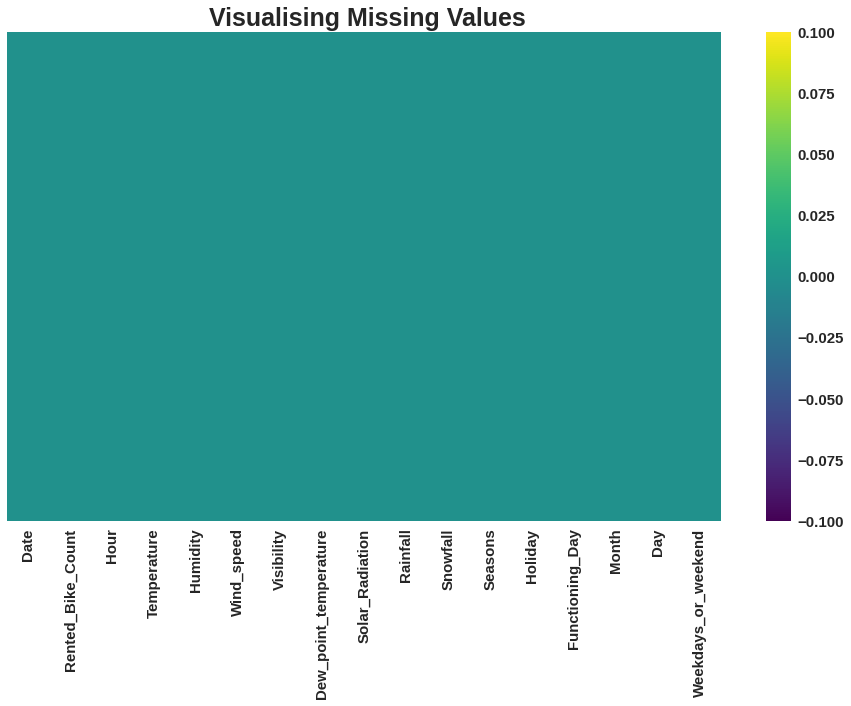

In [23]:
# Visulaizing null values using heatmap.

plt.figure(figsize=(16,9))

sns.heatmap(Bikeshare_df.isnull(),cmap='viridis',annot=False,yticklabels=False)

plt.title(" Visualising Missing Values")

#**No Null values found.**

In [24]:
# checking Duplicate rows in our Bikeshare Data.

duplicates=Bikeshare_df.duplicated().sum()

print(f"We have {duplicates} rows in our Bike Data.")



We have 0 rows in our Bike Data.


In [25]:
# Now We can Drop Day and Date columns.

Bikeshare_df.drop(['Date',"Day"],axis=1 ,inplace=True)

# **No duplicate rows found.**

#**Exploratory Data Analysis**

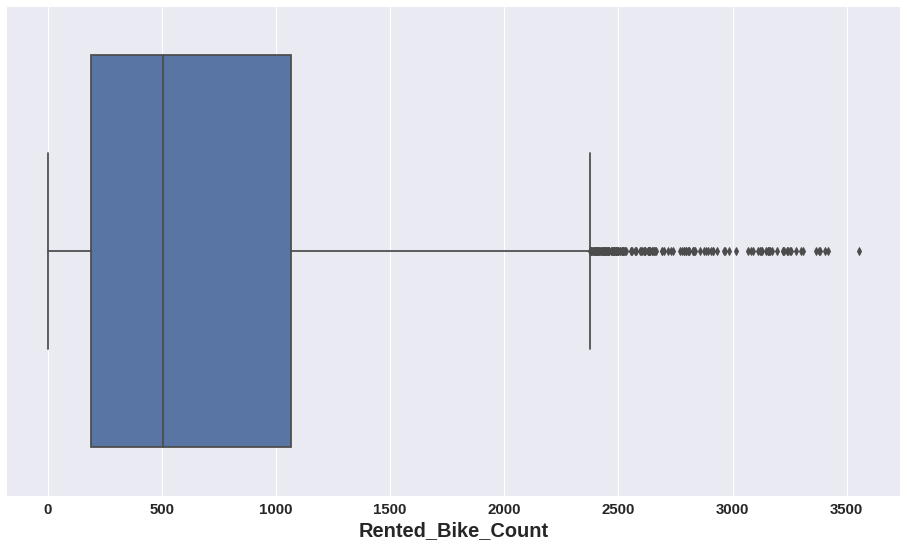

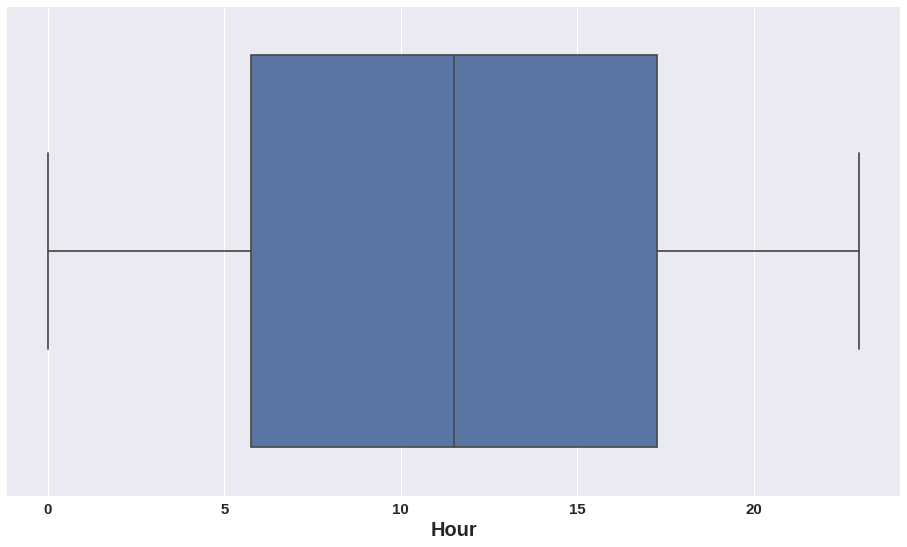

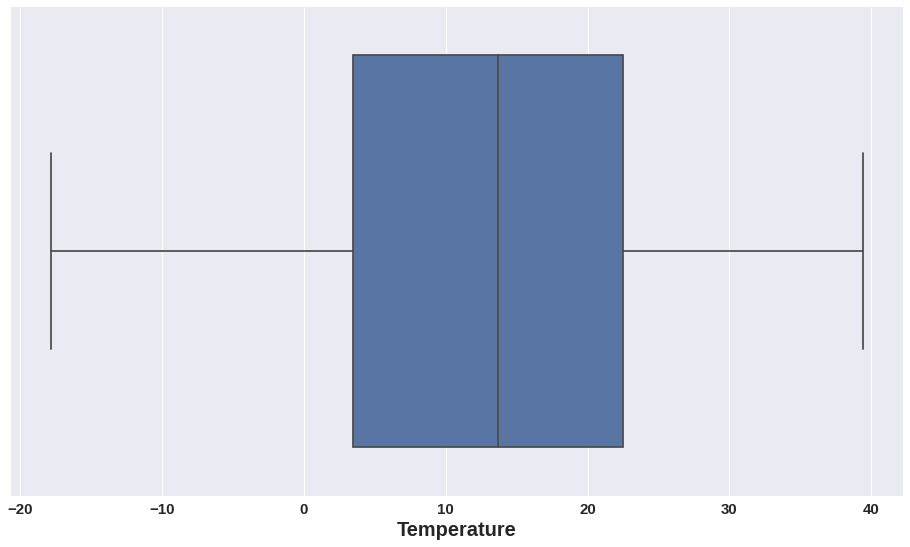

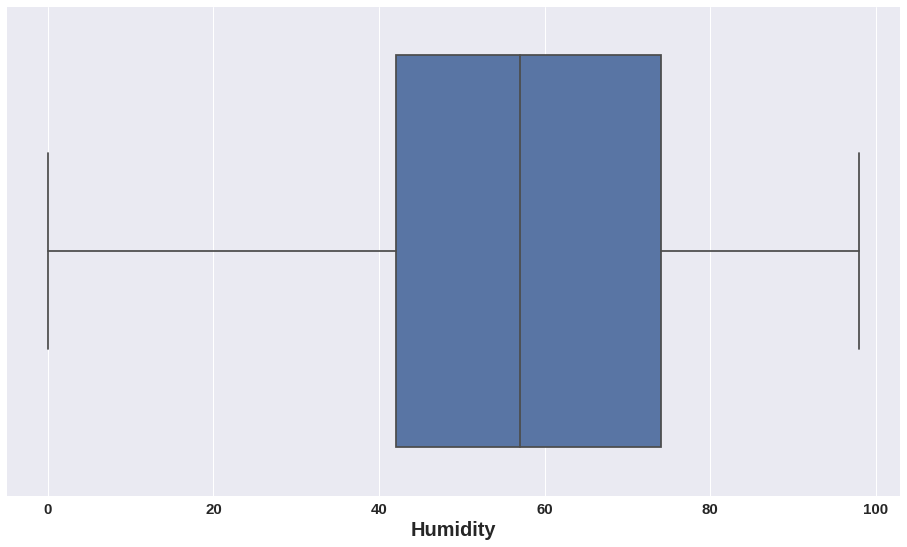

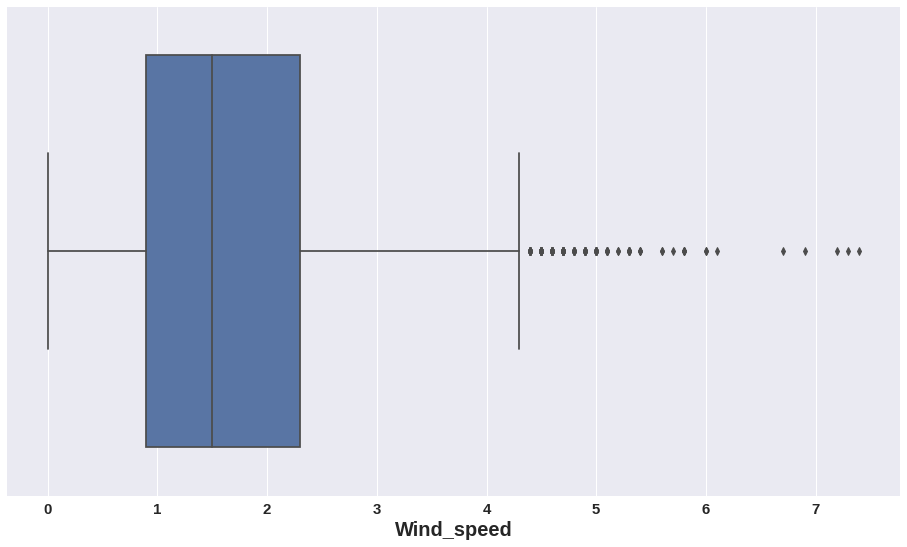

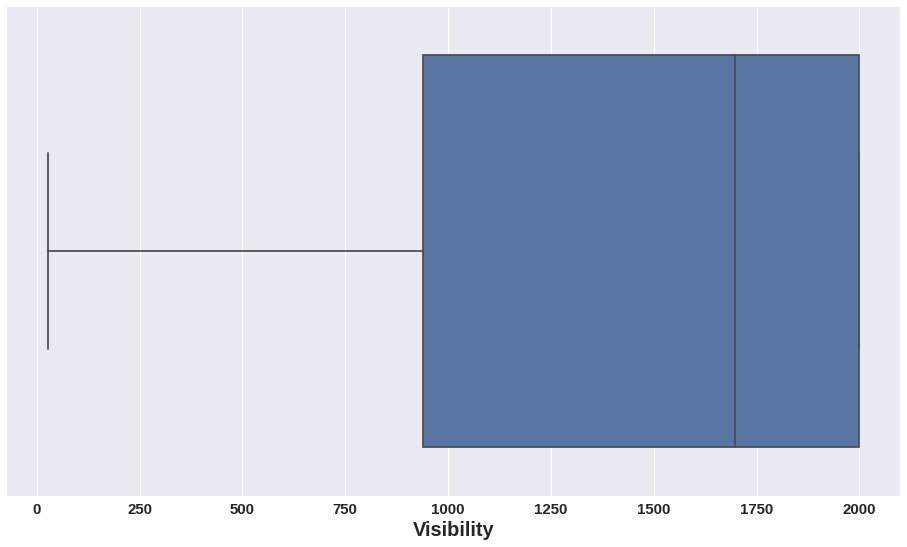

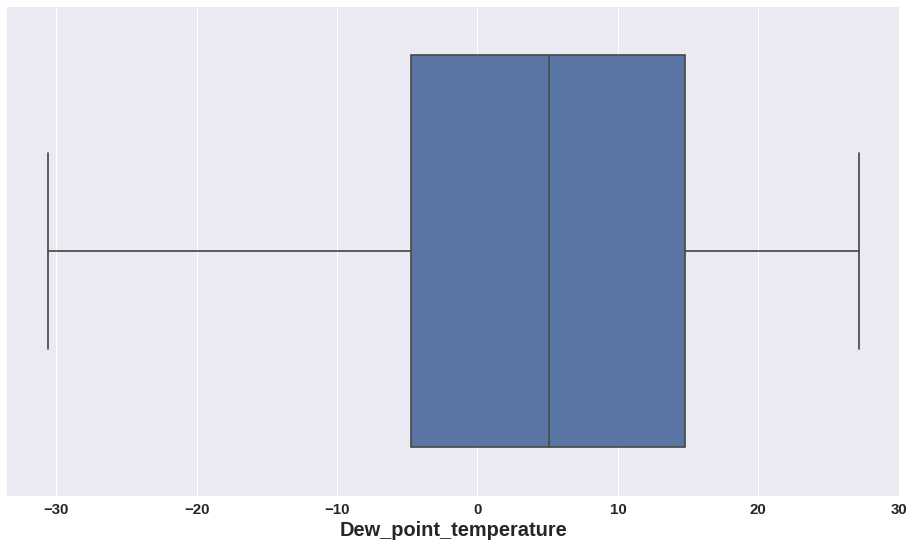

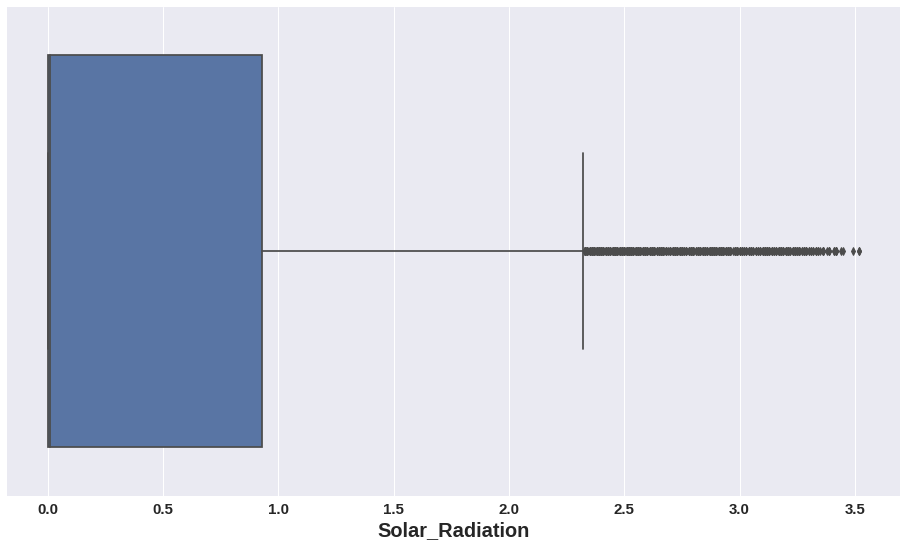

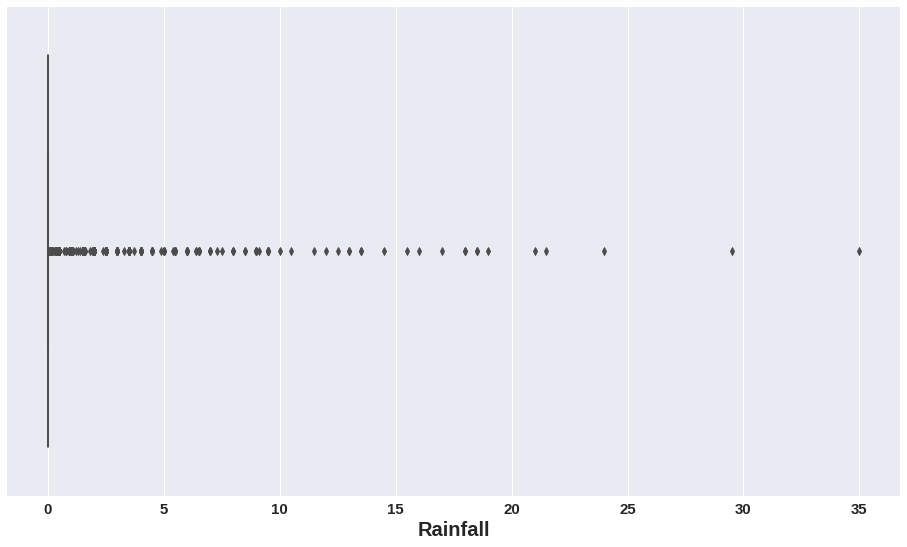

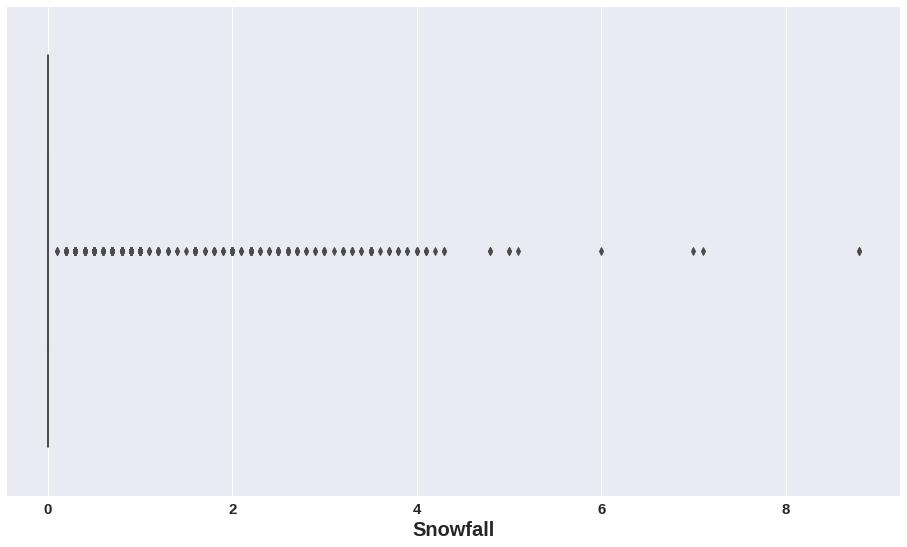

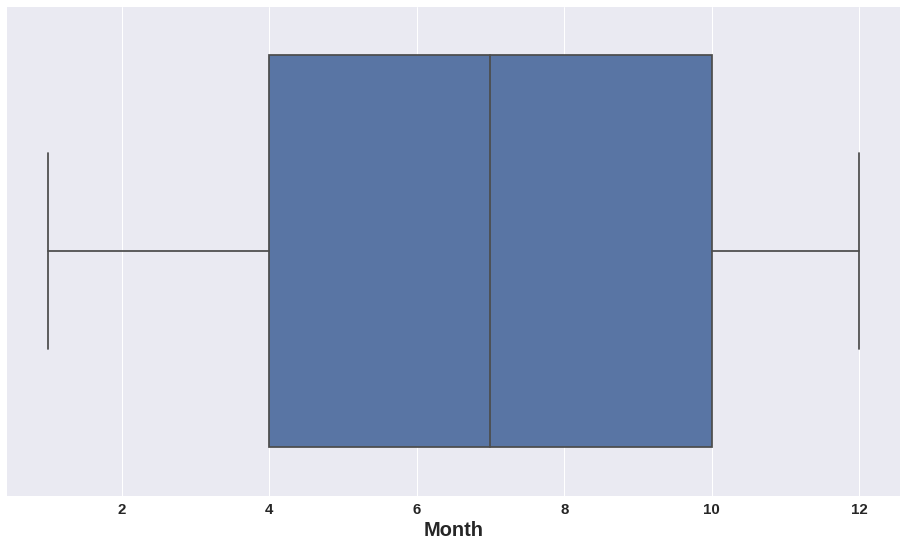

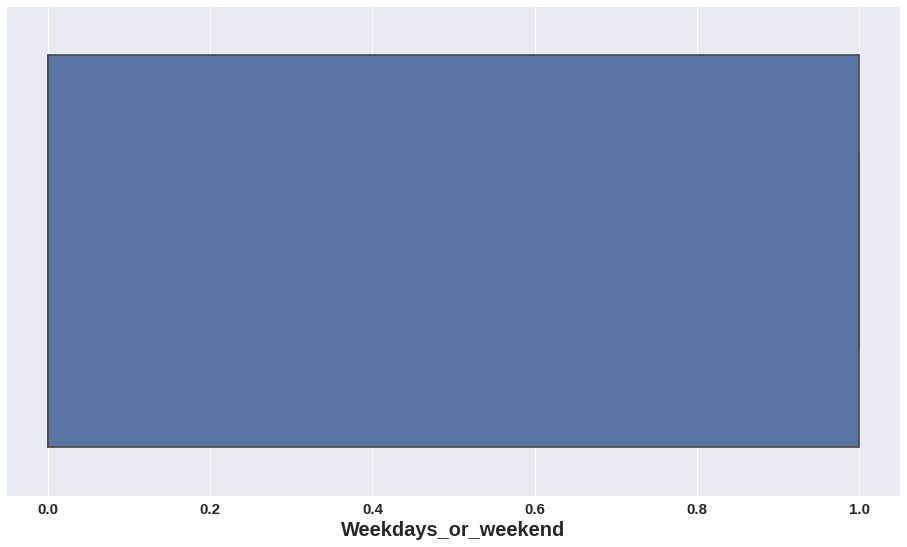

In [26]:
# create numeric columns list.
numeric_col=Bikeshare_df.describe().columns.tolist()
numeric_col

# create categorical column list
categorical_columns= list(set(Bikeshare_df.columns) - set(Bikeshare_df.describe().columns))
categorical_columns

# priting box plot of numeric columns to check oultliers
for col in numeric_col:
    fig = plt.figure(figsize=(16, 9))
    ax = fig.gca()
    sns.boxplot(x=Bikeshare_df[col])

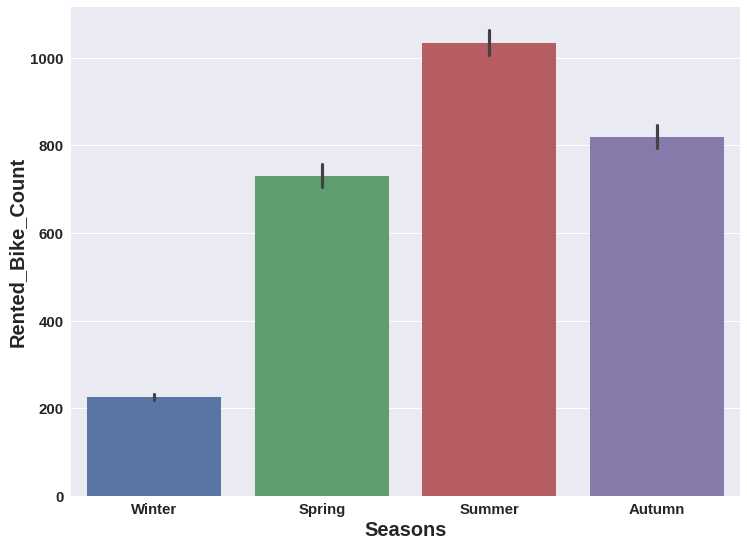

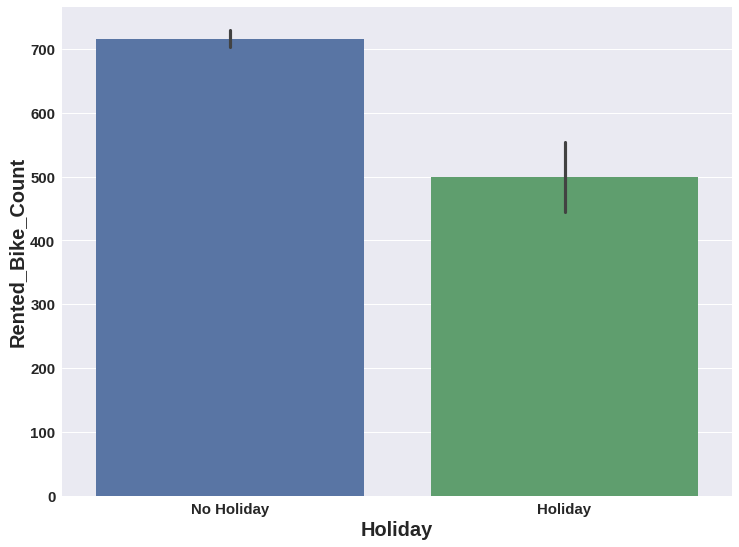

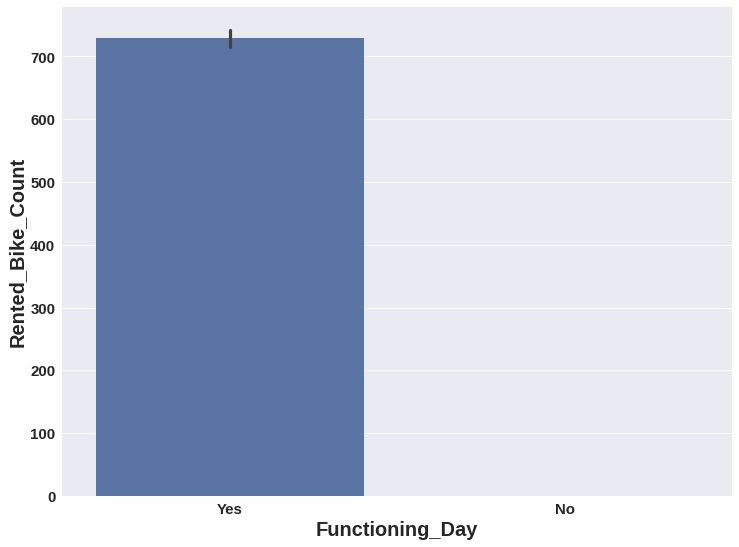

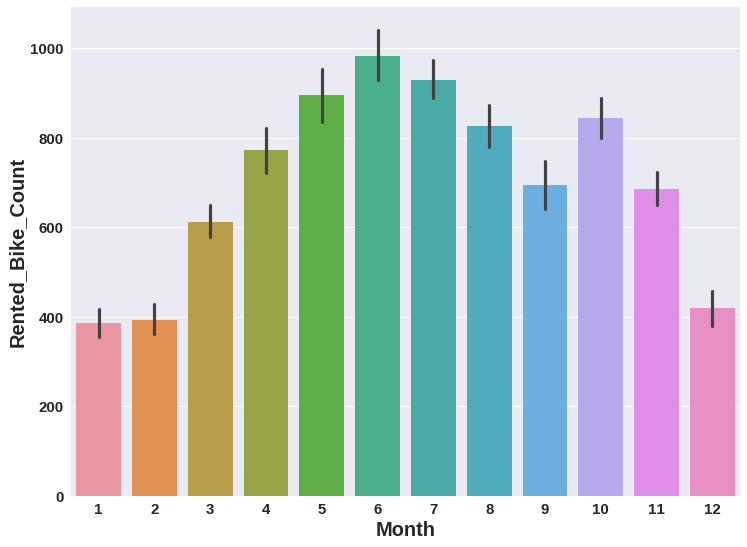

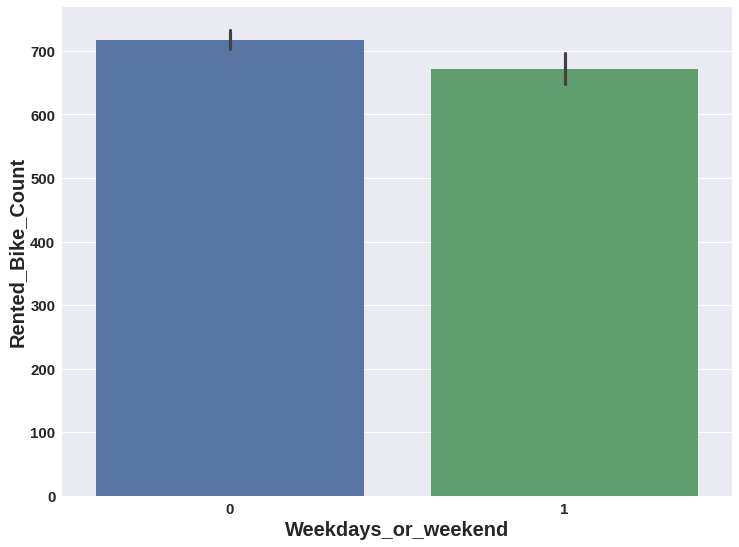

In [27]:

# Adding two  more categorical columns 
categorical_columns.extend(['Month','Weekdays_or_weekend'])

# Plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca()
    sns.barplot(x=Bikeshare_df[col],y=Bikeshare_df['Rented_Bike_Count'])

#**Observations From Above Bar charts**:

##**1) High number of bikes were rented on No Holidays.**

##**2) Most of the bikes were rented on Weekdays compared to weekends.**

##**3) Summer season had the highest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.**

##**4) From March Bike Rent Count started increasing and it was highest in June.**

##**5) On no functioning day no bikes were rented. we have only 295 counts of "NO". Thus we can drop that 295 values but column having only "Yes' will not add value to our column. So these columns is not use full for us. We will drop those in next steps.**




#**Let's check Bike Rent Count trend with respect to Hour on Functioning days,weekends or weekdays,seasons,Holidays columns.**

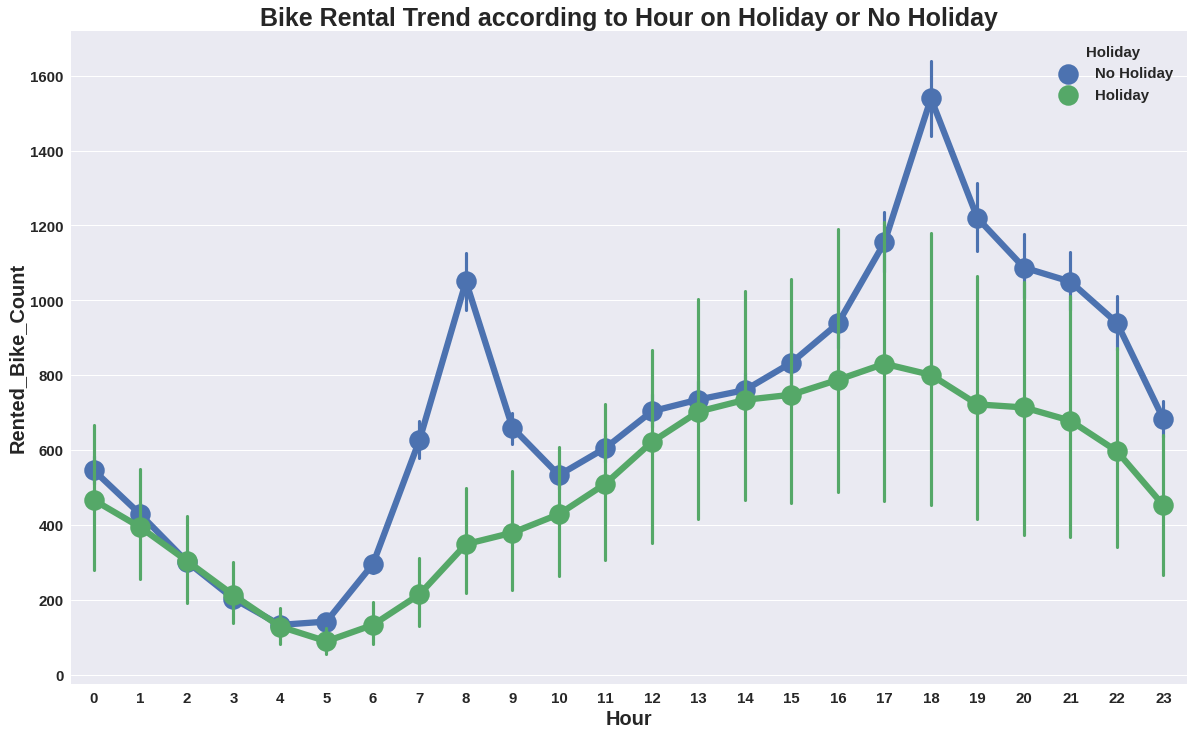

In [28]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday.

plt.figure(figsize=(20,12))

sns.pointplot(x=Bikeshare_df['Hour'],y=Bikeshare_df['Rented_Bike_Count'],hue=Bikeshare_df['Holiday'],scale=2)

plt.title("Bike Rental Trend according to Hour on Holiday or No Holiday")

plt.show()

#**Observation**
##**1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.( NO Holiday). But on Holiday the case is different less bike rentals happend.**

##**2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.( NO Holiday).**

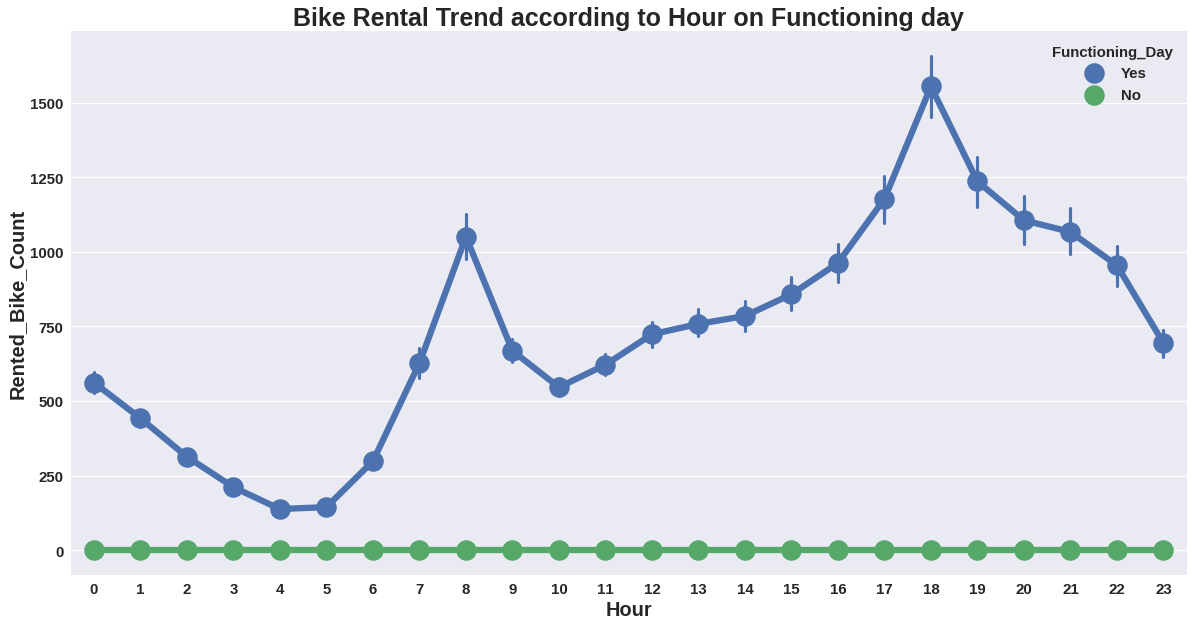

In [29]:
## Bike Rental trend with respect to Hour on Functioning day.

plt.figure(figsize=(20,10))

sns.pointplot(x=Bikeshare_df['Hour'],y=Bikeshare_df['Rented_Bike_Count'],hue=Bikeshare_df['Functioning_Day'],scale=2)

plt.title("Bike Rental Trend according to Hour on Functioning day")

plt.show()

#**Observation**
##**1) Here the trend for functioning day is same as of No holiday. Only the difference is on No functioning day there is no bike rentals.**

#**(if we drop no fucntioning day rows.we will left only with the functioning day values.thus the column having same value through out will not be helpful.So,its better to drop the column.)**

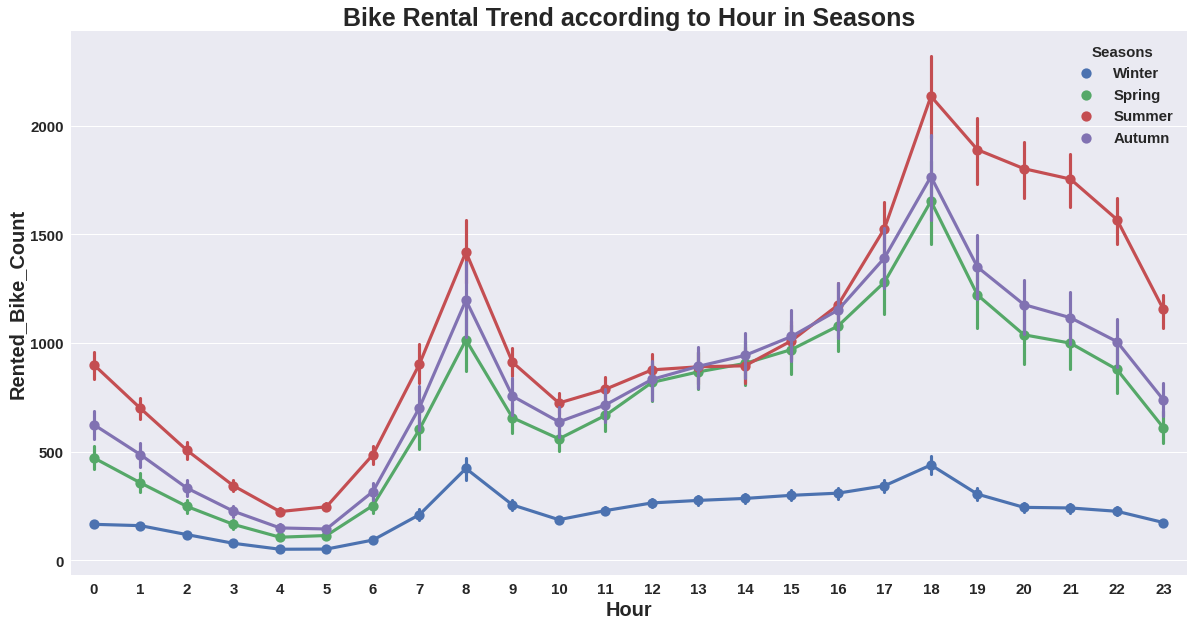

In [30]:
## Bike Rent Count trend with respect Hours on Seasons.

plt.figure(figsize=(20,10))

sns.pointplot(x=Bikeshare_df['Hour'],y=Bikeshare_df['Rented_Bike_Count'],hue=Bikeshare_df['Seasons'])

plt.title("Bike Rental Trend according to Hour in Seasons")

plt.show()

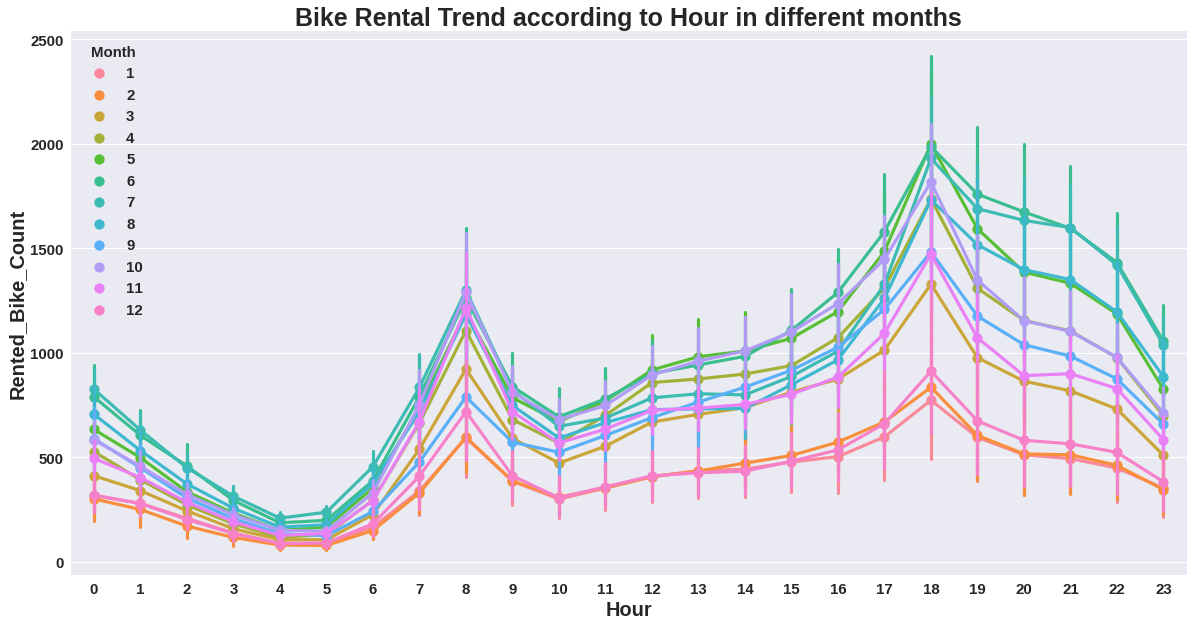

In [31]:
## Bike Rent Count trend with respect Hours on Months

plt.figure(figsize=(20,10))

sns.pointplot(x=Bikeshare_df['Hour'],y=Bikeshare_df['Rented_Bike_Count'],hue=Bikeshare_df['Month'])

plt.title("Bike Rental Trend according to Hour in different months")

plt.show()

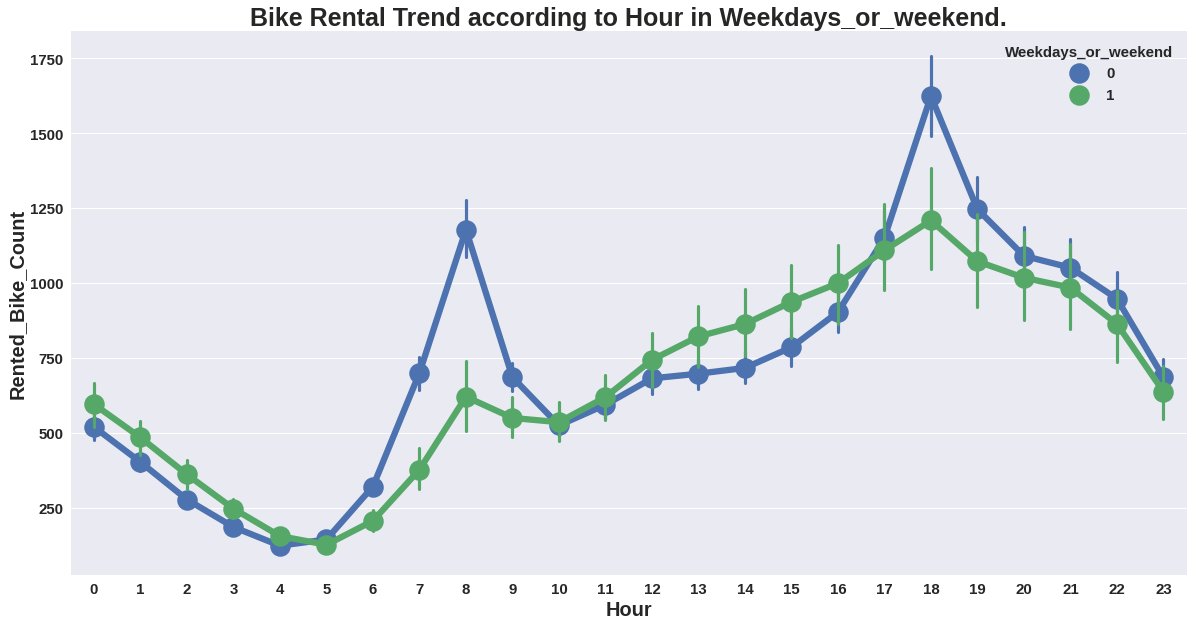

In [32]:
## Bike Rent Count trend with respect Hours on Weekdays or weekends

plt.figure(figsize=(20,10))

sns.pointplot(x=Bikeshare_df['Hour'],y=Bikeshare_df['Rented_Bike_Count'],hue=Bikeshare_df['Weekdays_or_weekend'],scale=2)

plt.title("Bike Rental Trend according to Hour in Weekdays_or_weekend.")

plt.show()

# 0= weekdays
#1= weekend

#**Let's check distribution of target variable- "Bike Rented Count"**

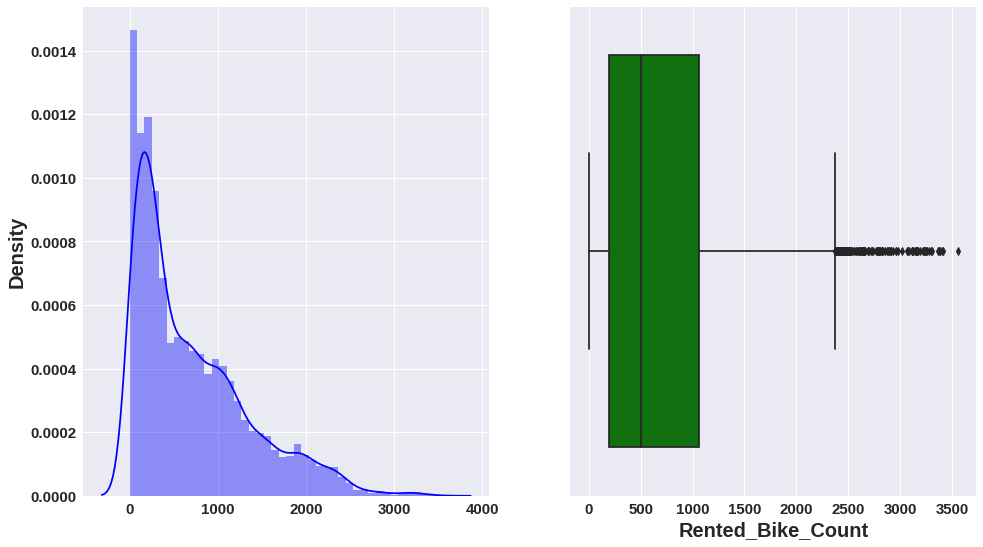

In [33]:
# plotting subplots

f, axes = plt.subplots(1, 2,figsize=(16,9))

sns.distplot(x=Bikeshare_df['Rented_Bike_Count'],color='b',ax=axes[0])

# plt.figure(figsize=(15,8))

sns.boxplot(x=Bikeshare_df['Rented_Bike_Count'],color='g',ax=axes[1])

plt.show()

##**Our target varibale's distribution is slightly right skewed.**

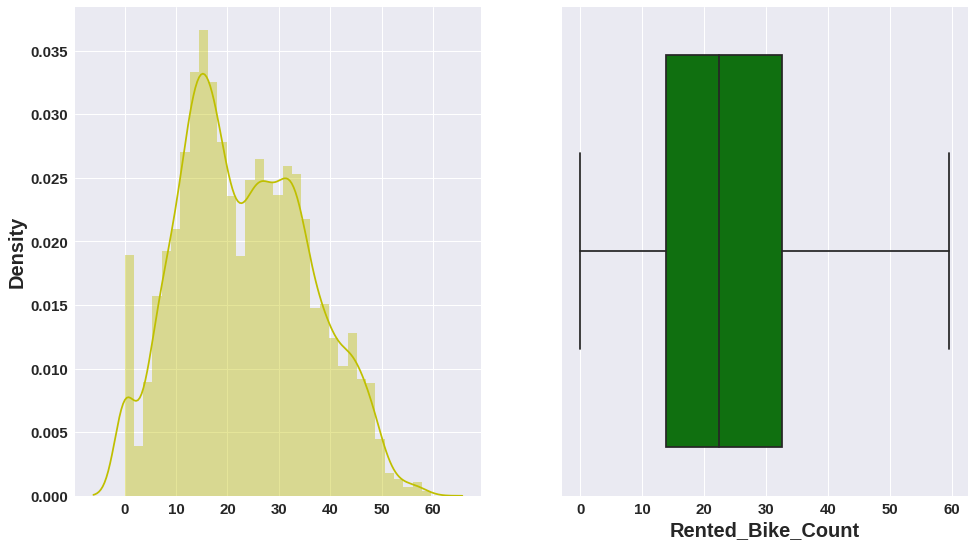

In [34]:
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(16,9))

sns.distplot(x=np.sqrt(Bikeshare_df['Rented_Bike_Count']),color='y',ax=axes[0])

sns.boxplot(x=np.sqrt(Bikeshare_df['Rented_Bike_Count']),color='g',ax=axes[1])


plt.show()

**Thus we normalized our dependent variable by square root method and also in boxplot we can see there are no outliers present.**

#**Let's check distribution of independent variables**

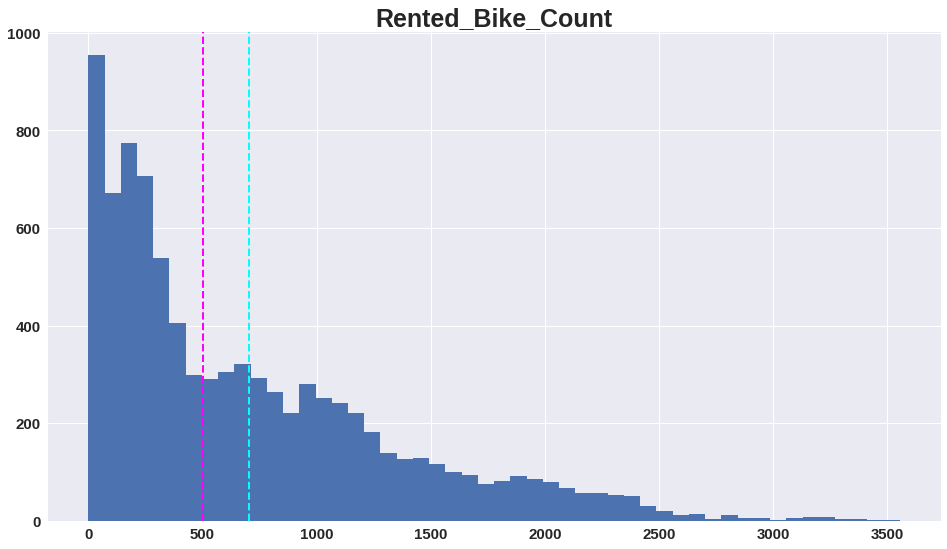

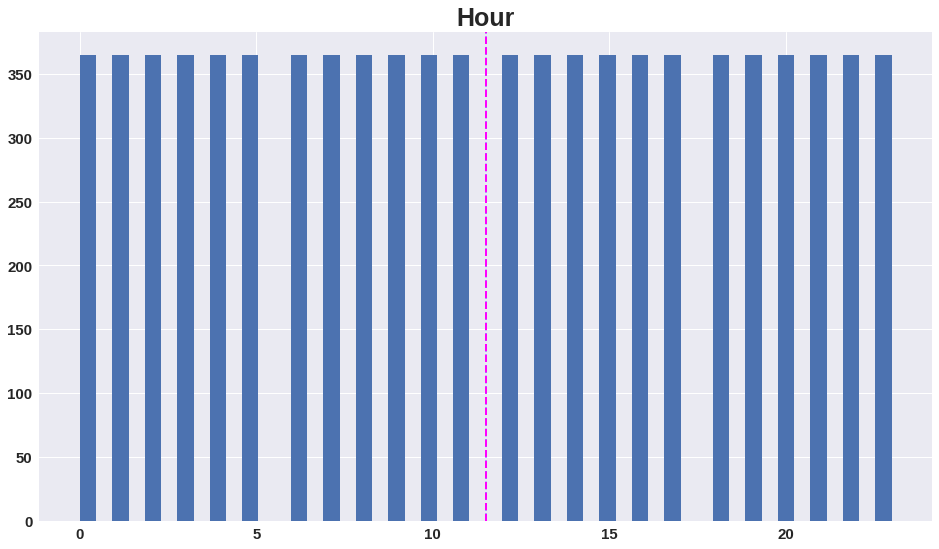

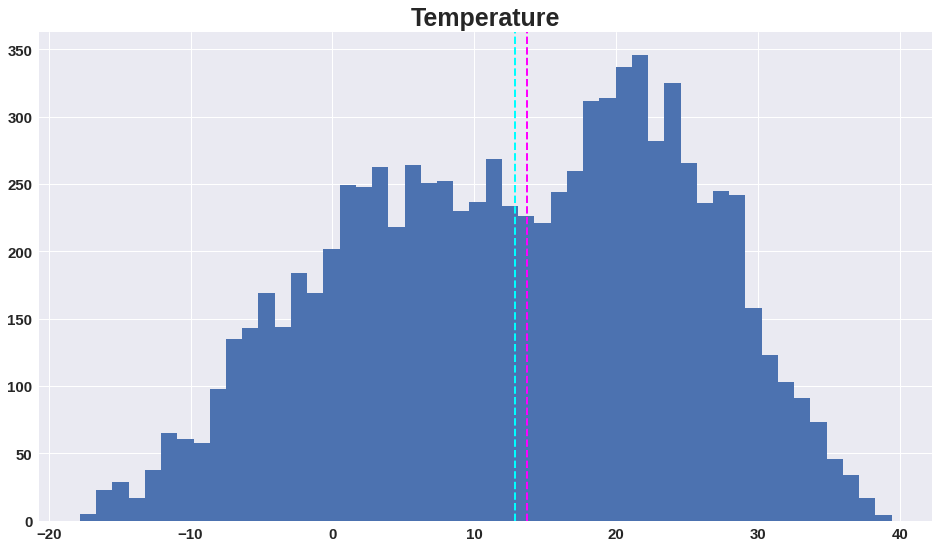

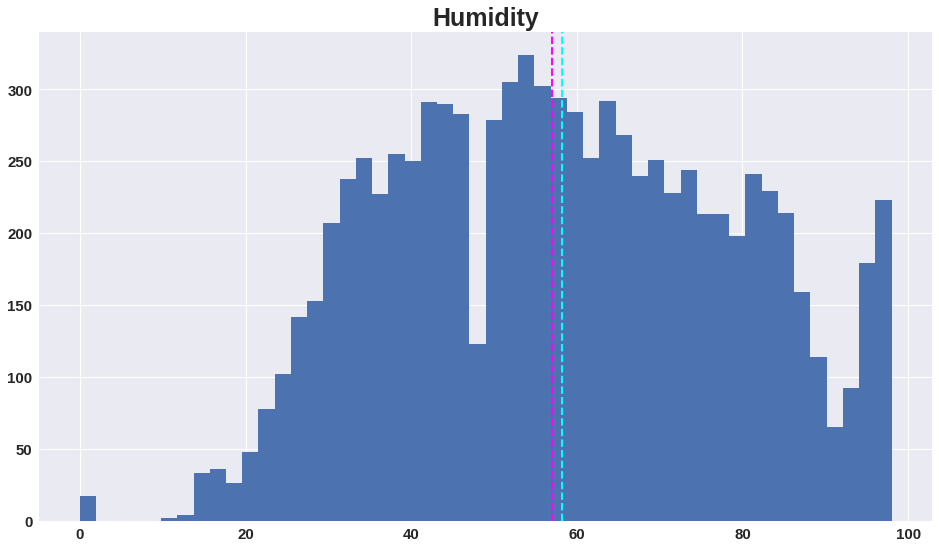

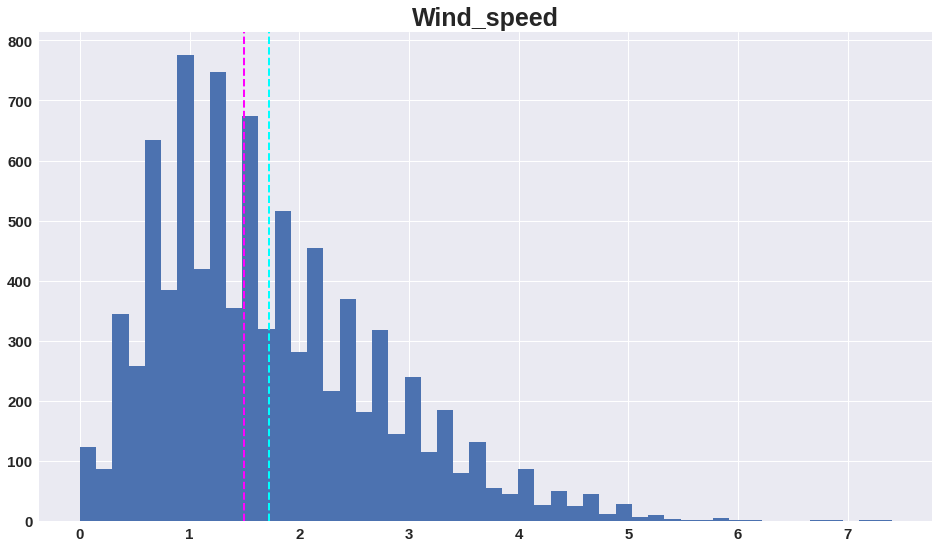

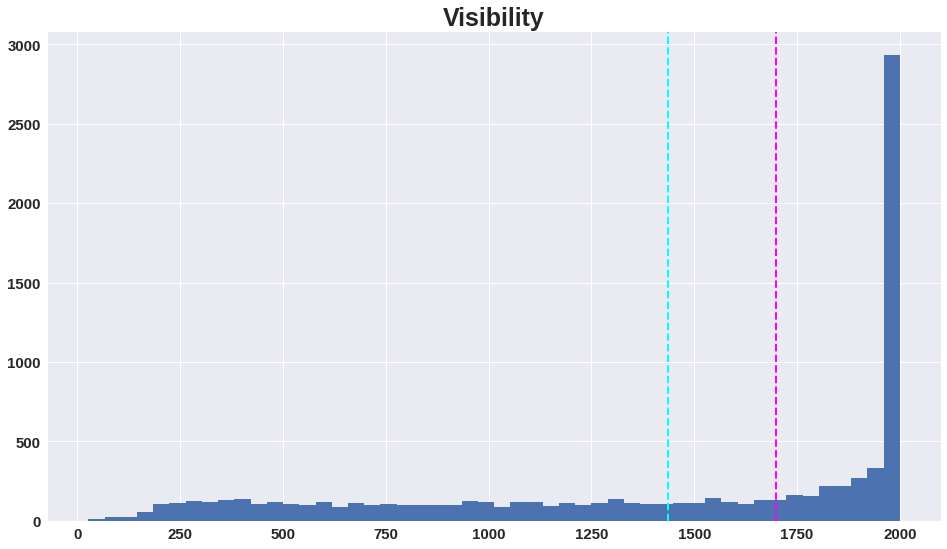

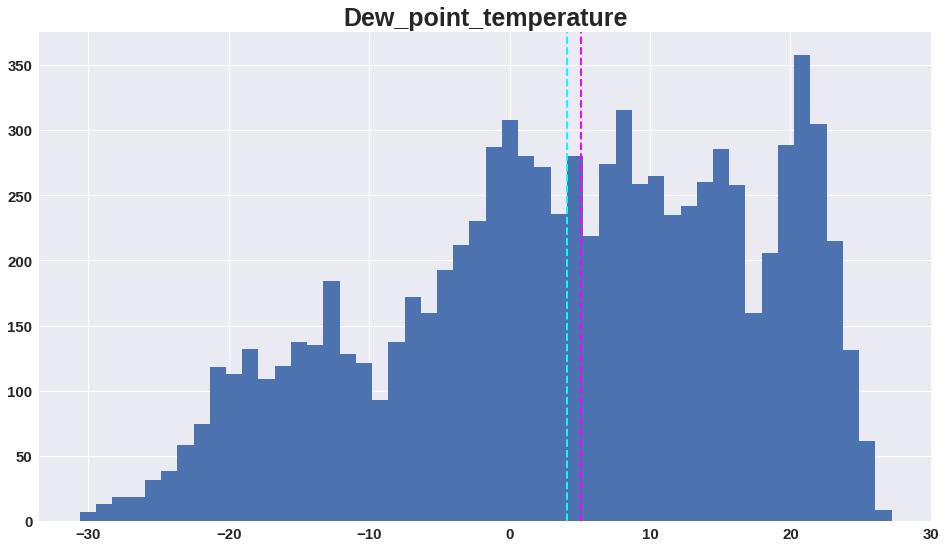

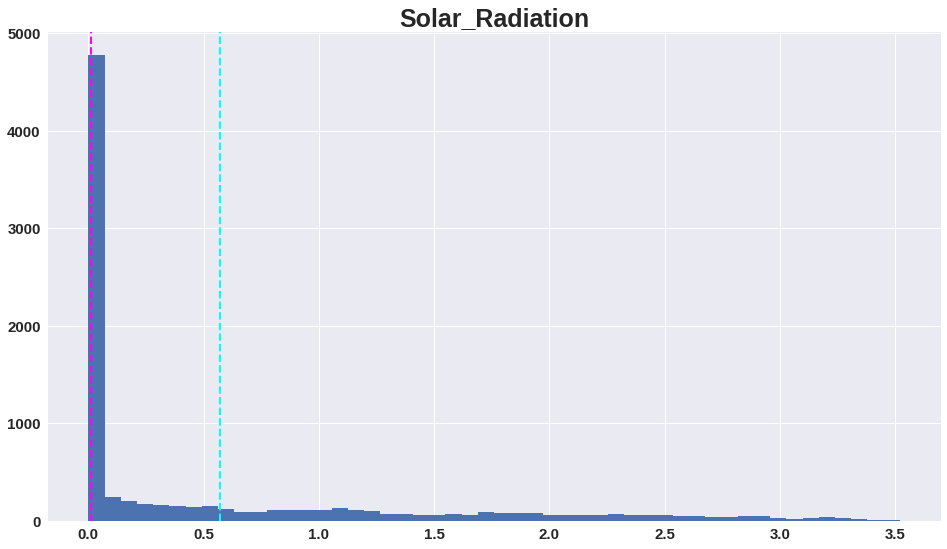

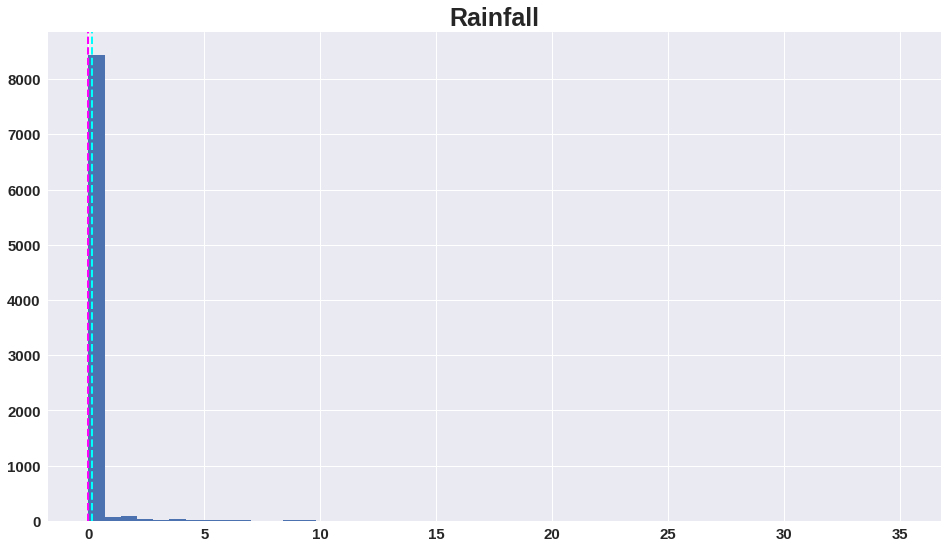

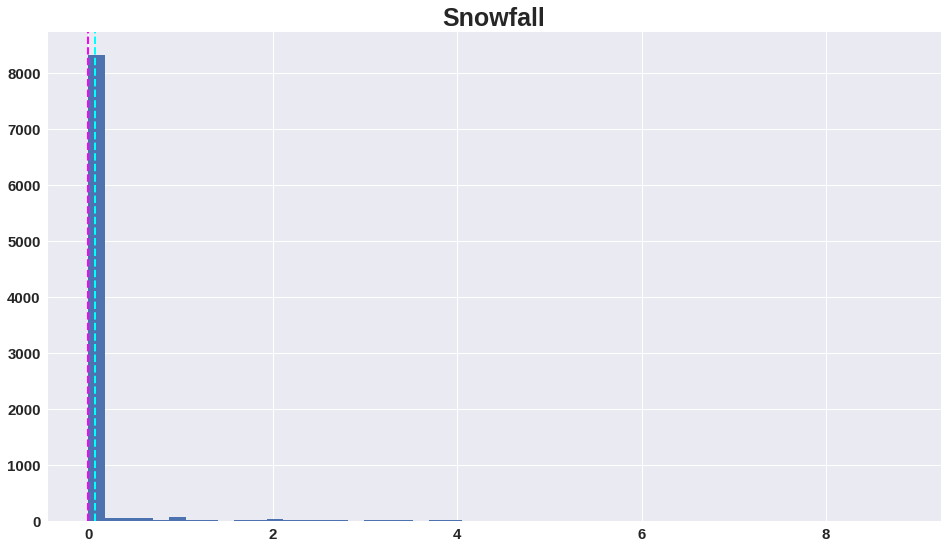

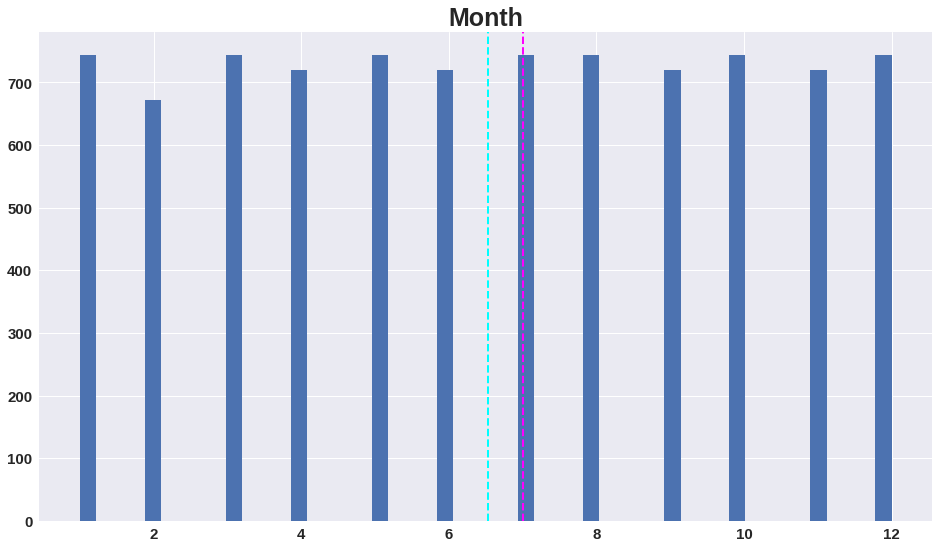

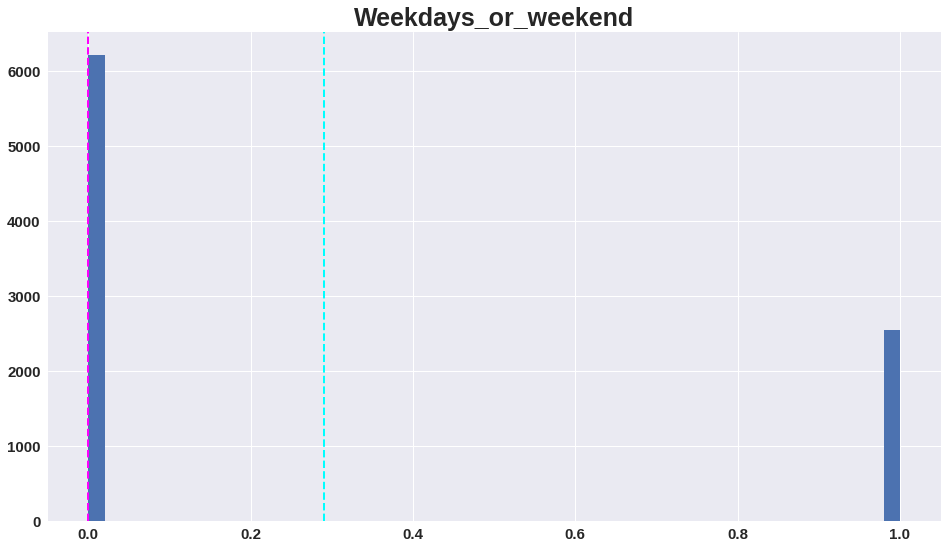

In [35]:
# Plot  a histogram graph to check where mean and medians are lying in the distribution and the data points in variables are distributed.

for col in numeric_col:
    fig = plt.figure(figsize=(16, 9))
    ax = fig.gca()
    feature = Bikeshare_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='cyan', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

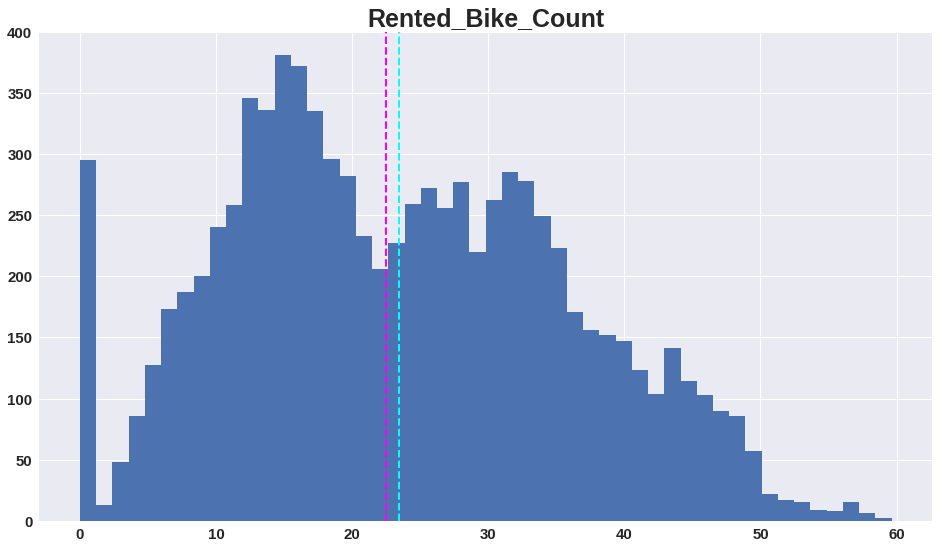

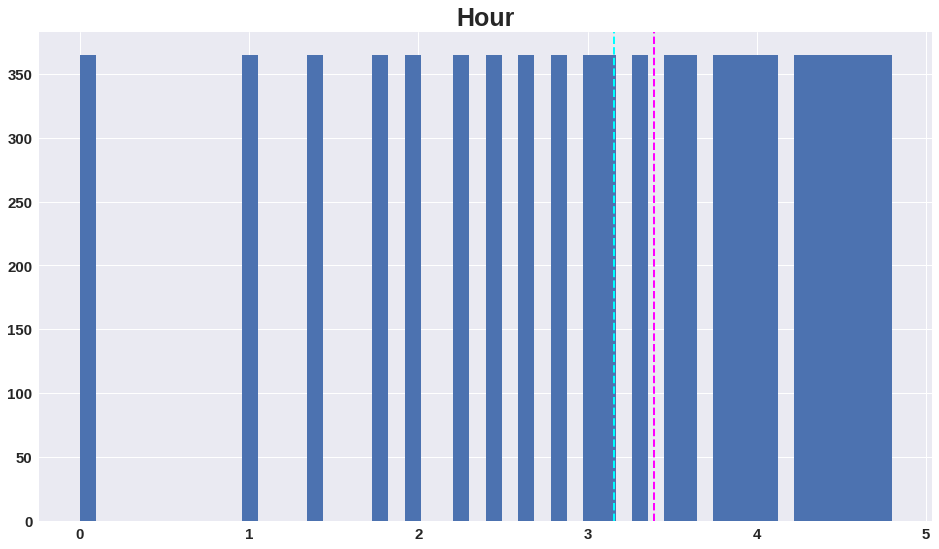

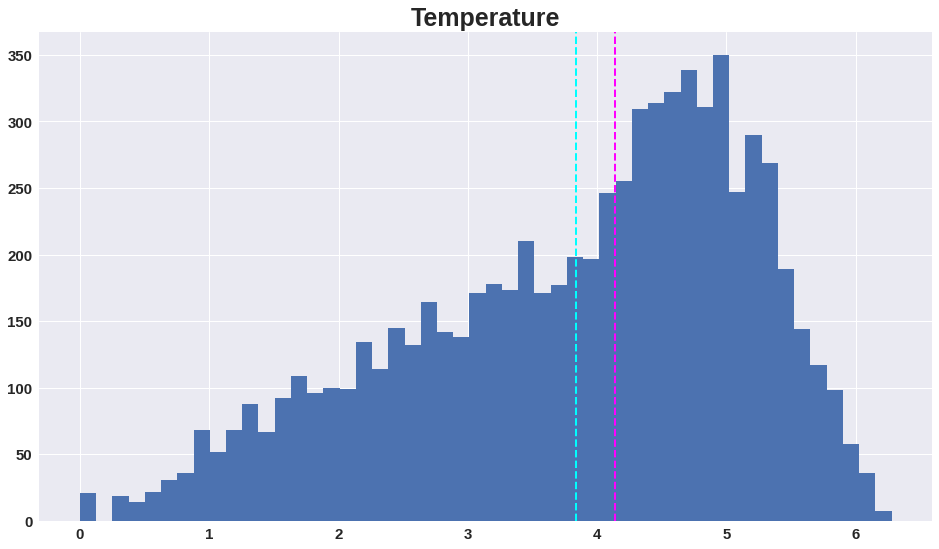

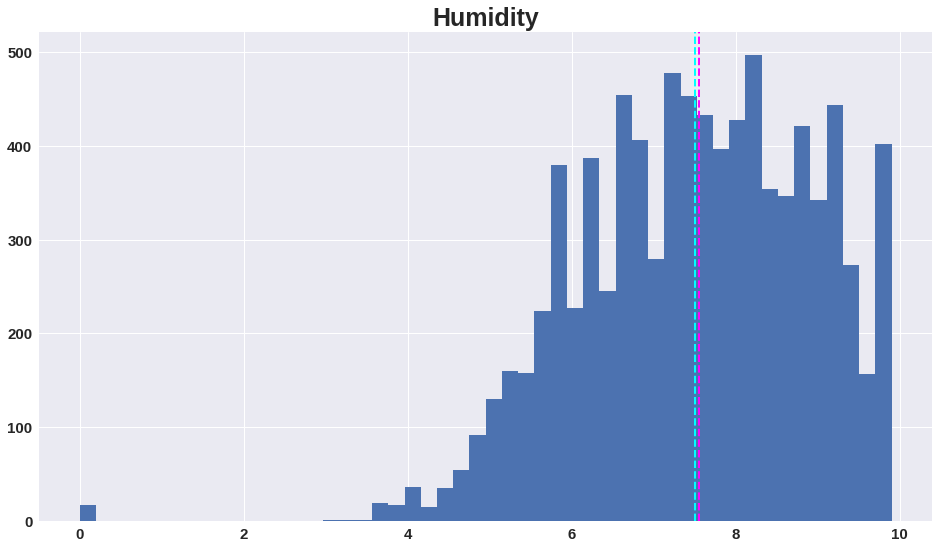

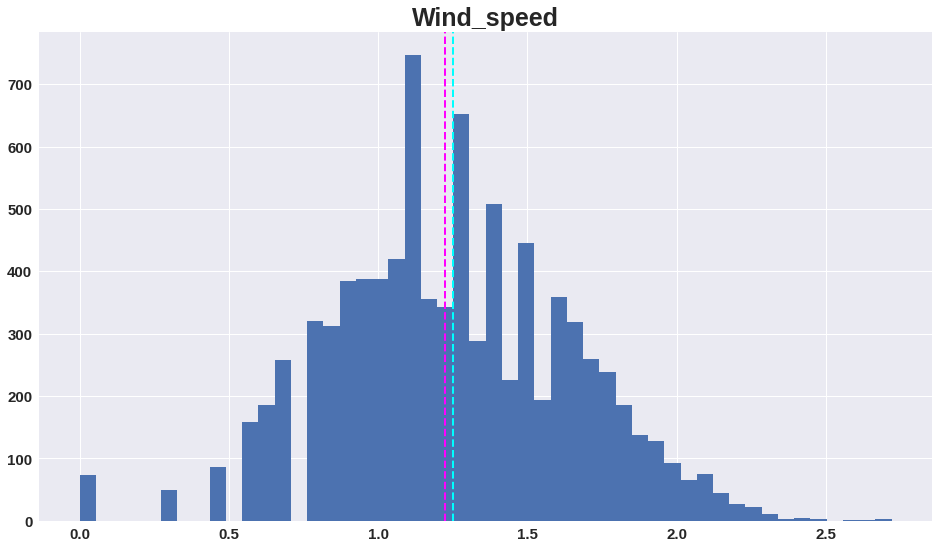

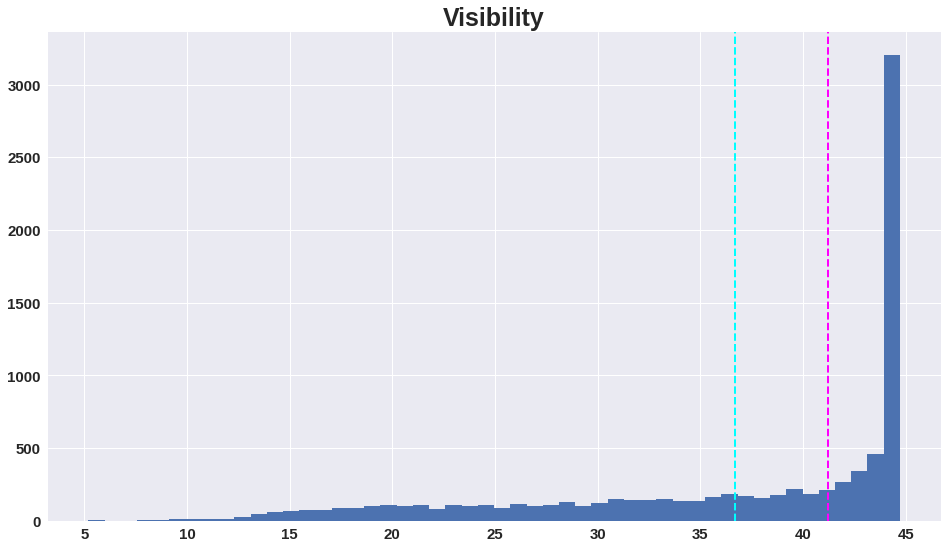

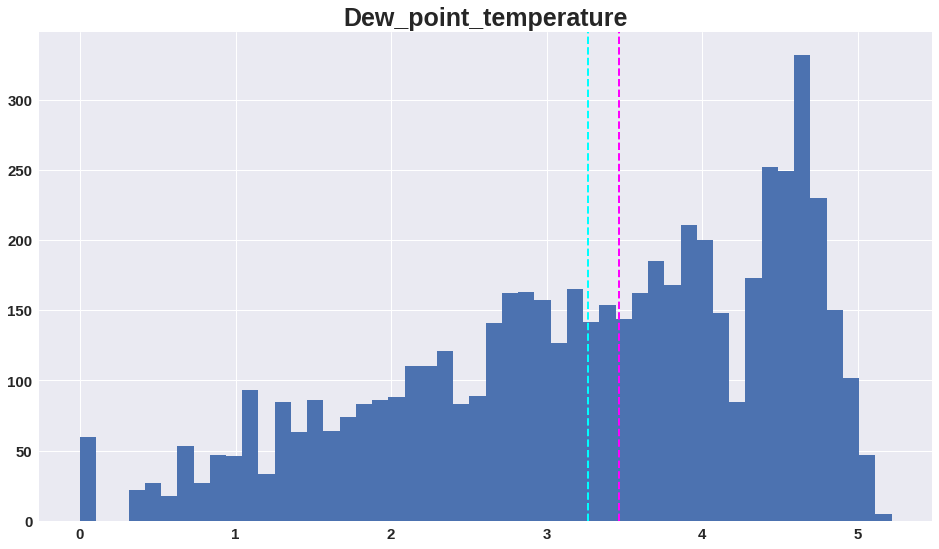

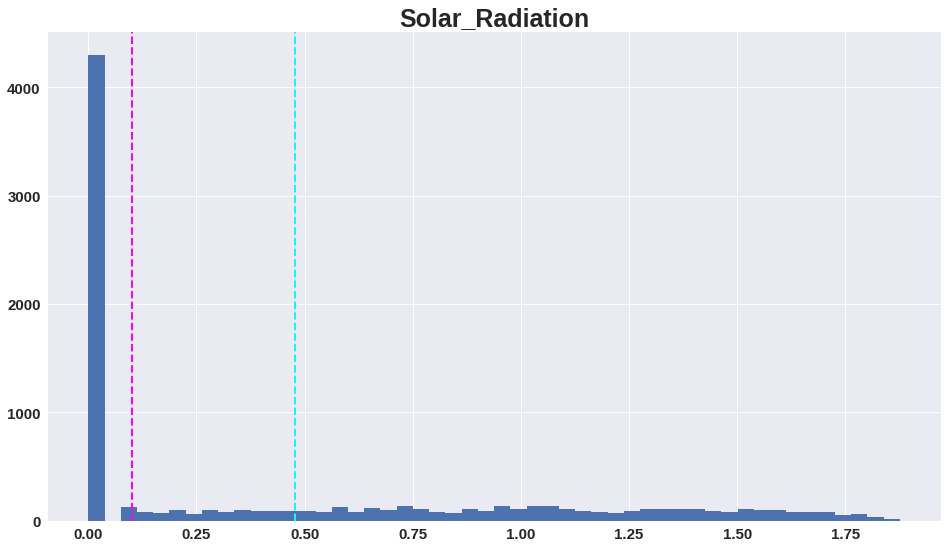

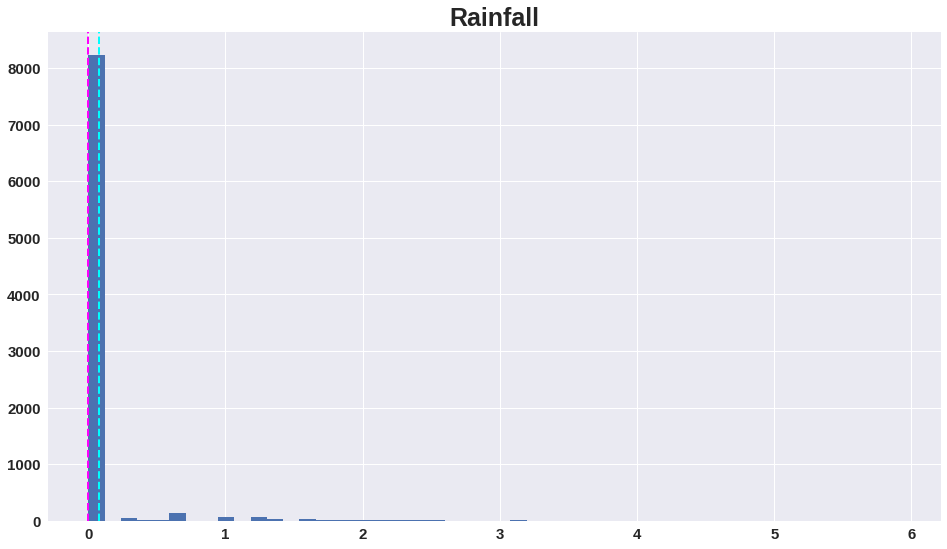

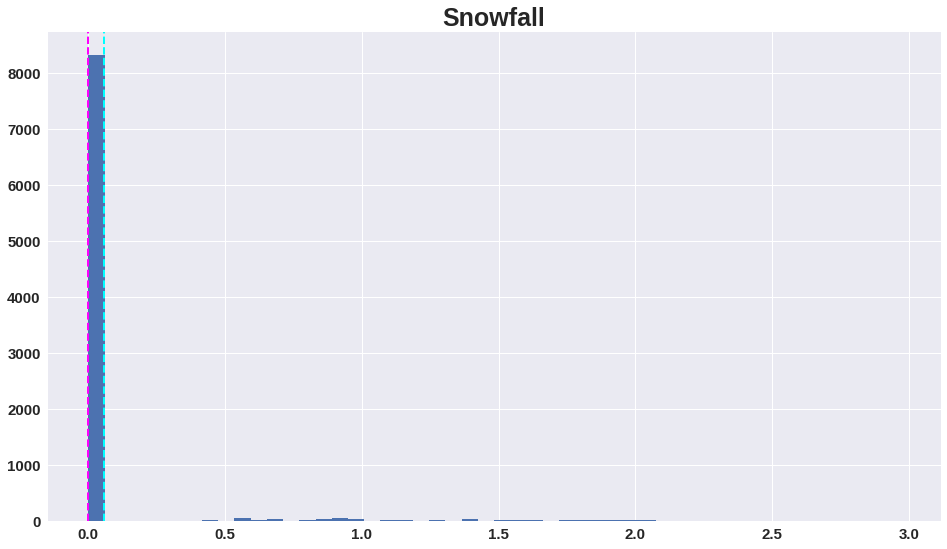

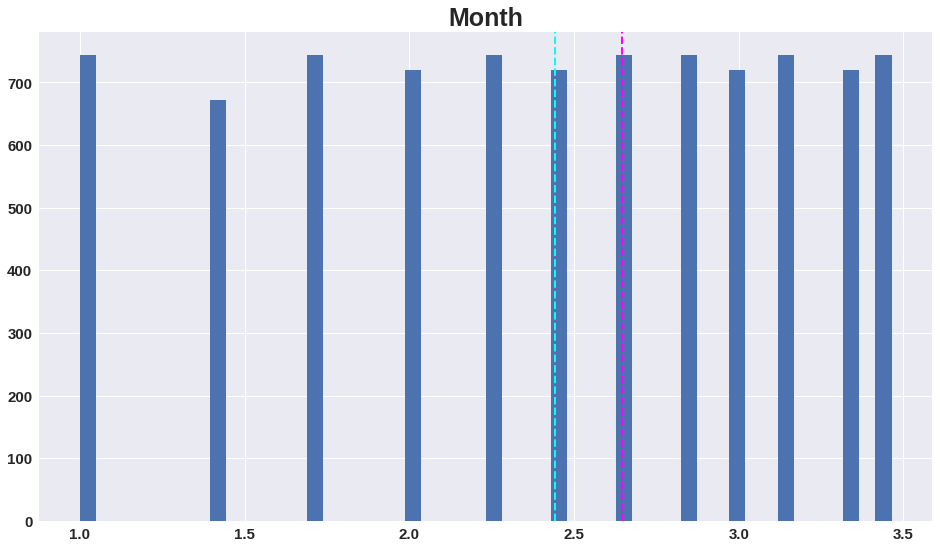

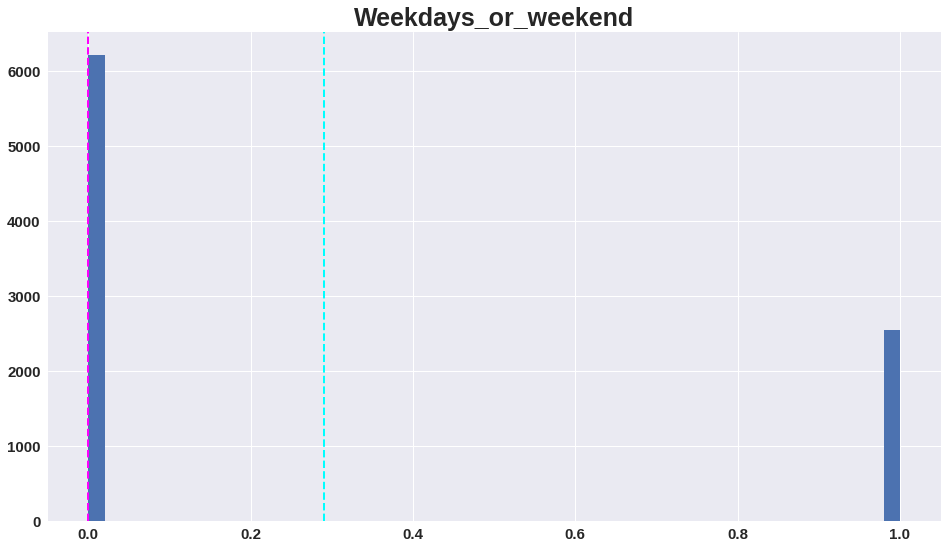

In [36]:
# Normalizing The variables using squre root method.
for col in numeric_col:
    fig = plt.figure(figsize=(16, 9))
    ax = fig.gca()
    feature = np.sqrt(Bikeshare_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='cyan', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

#**Lets check the relationship between the dependent variable-"Rented Bike Count'and remaining columns(independent variable).**

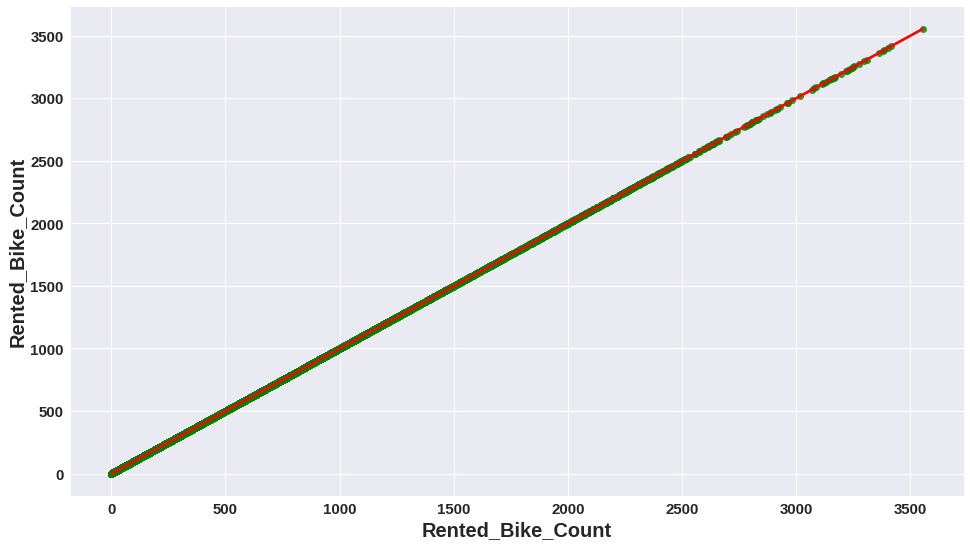

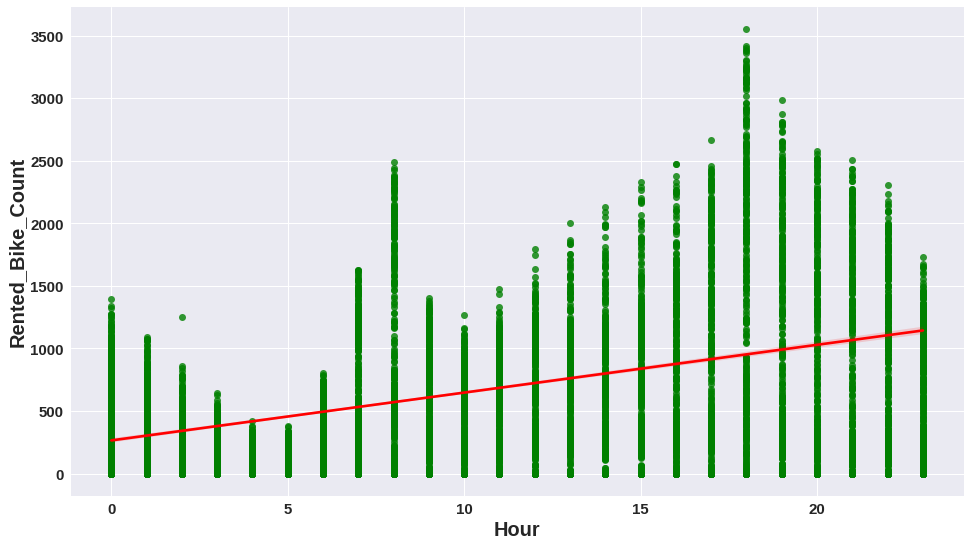

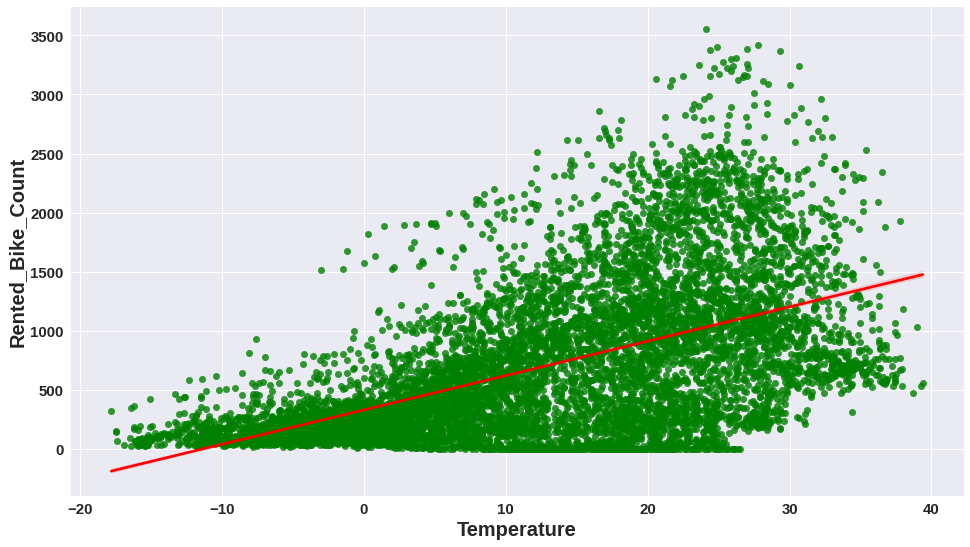

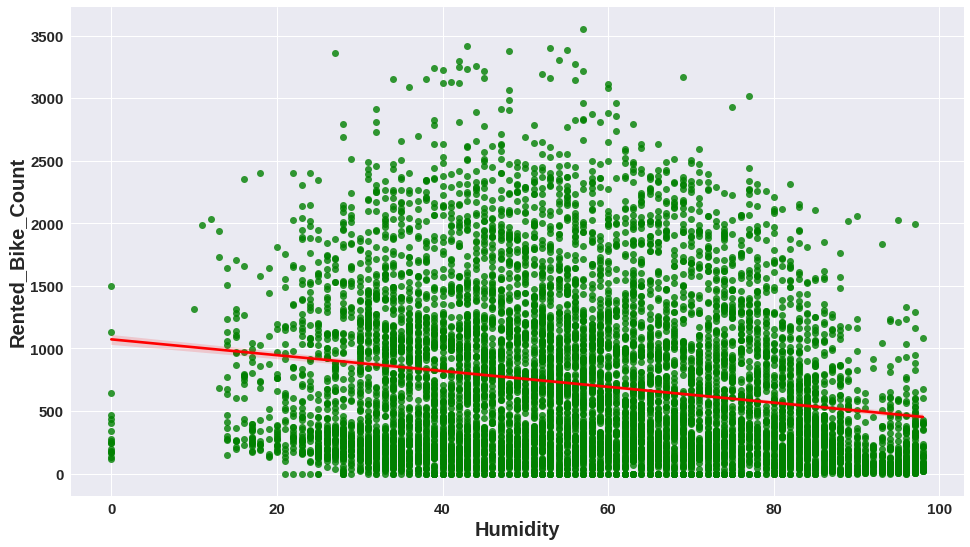

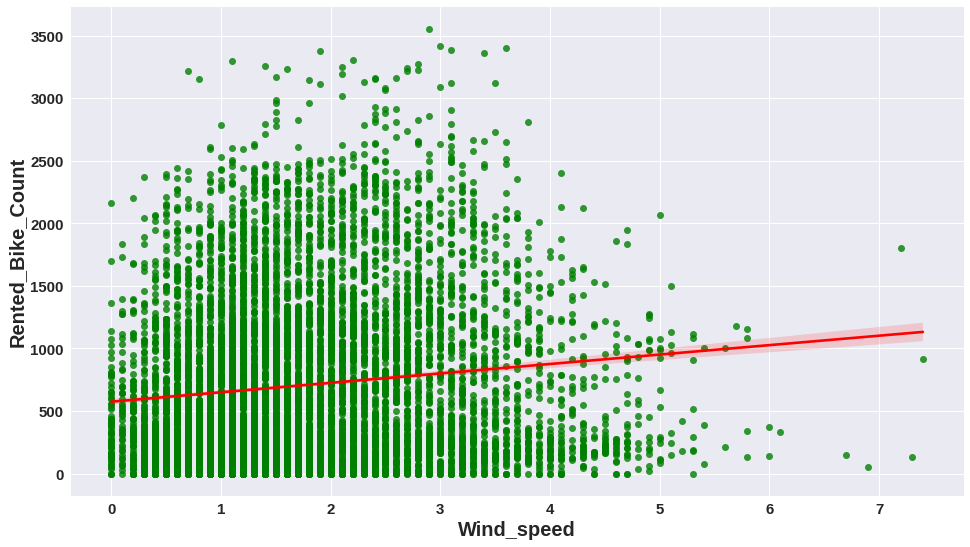

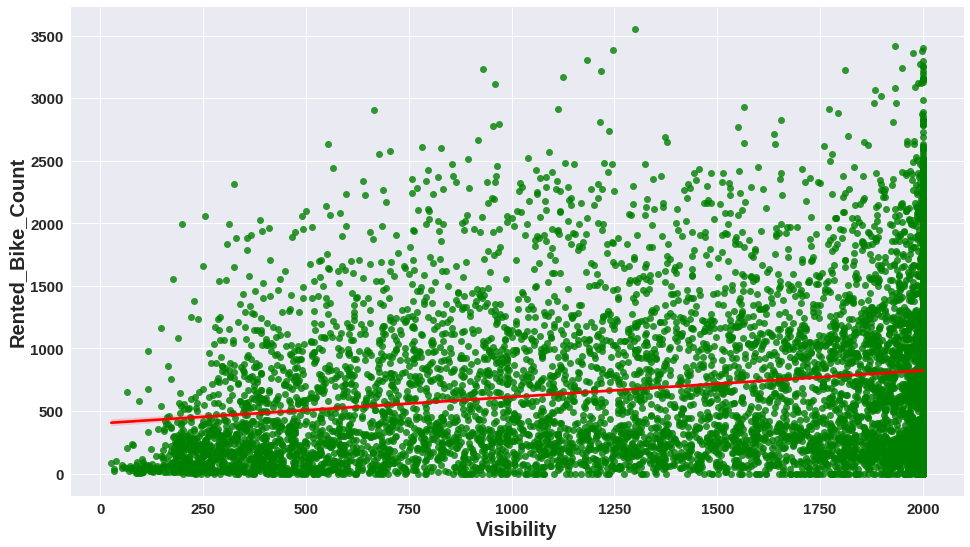

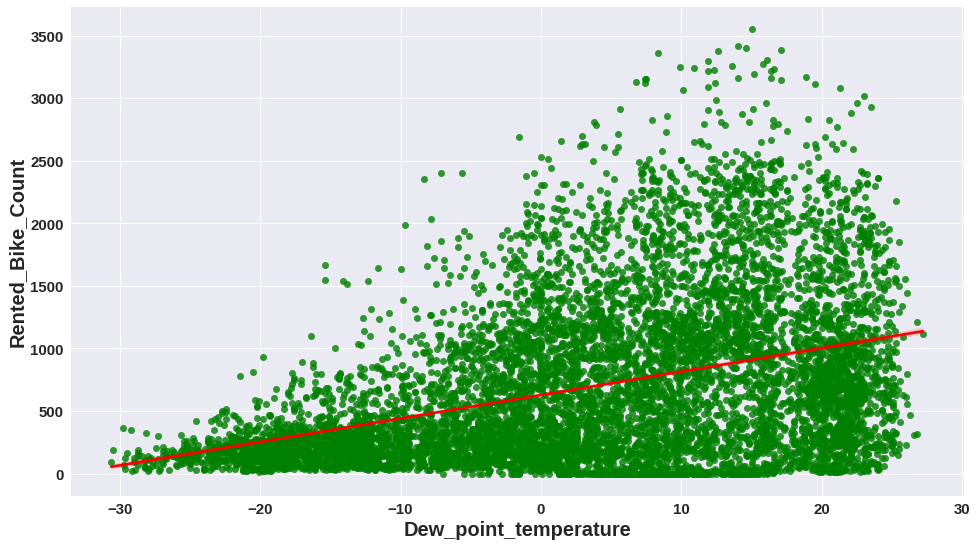

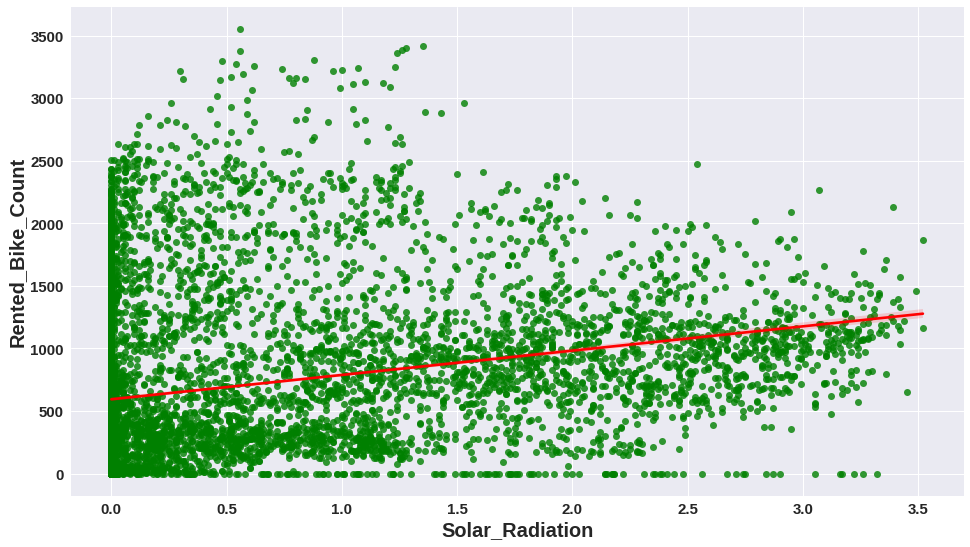

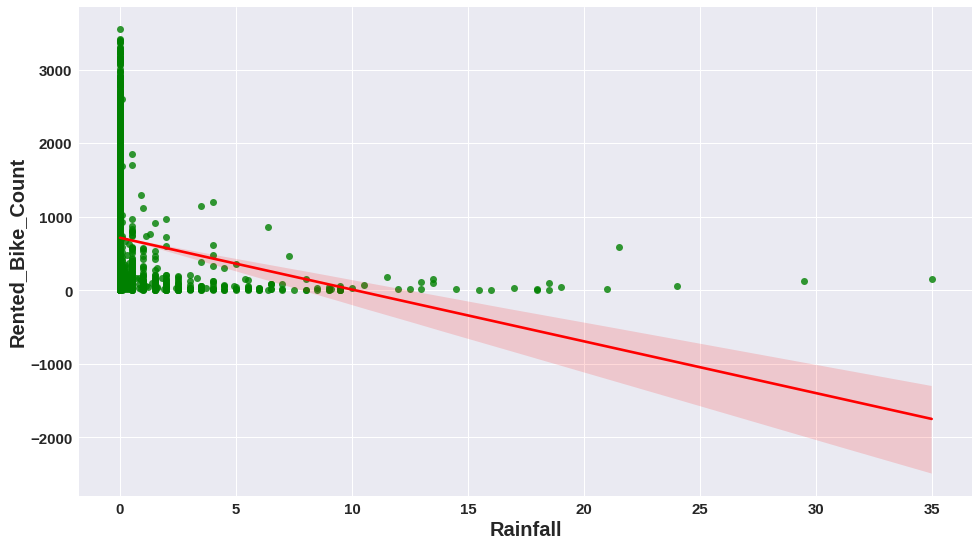

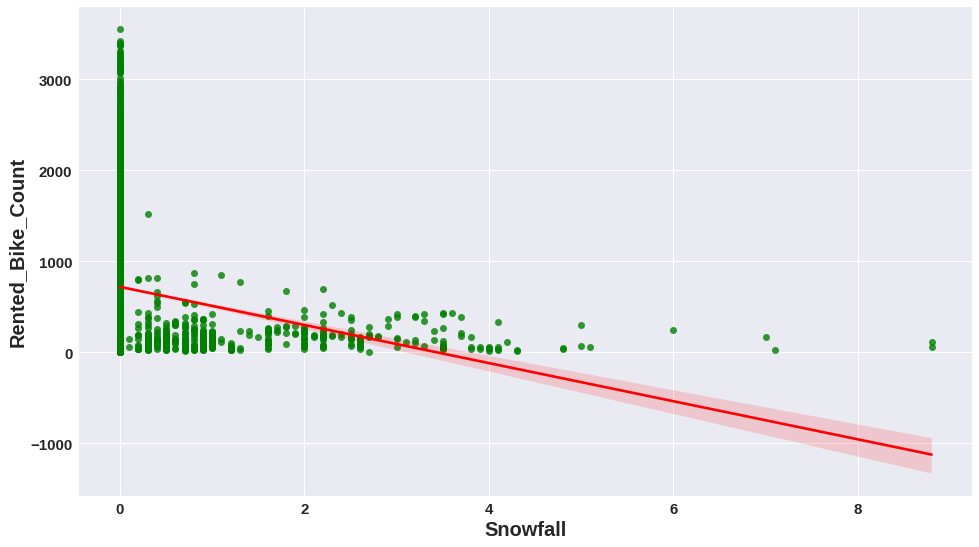

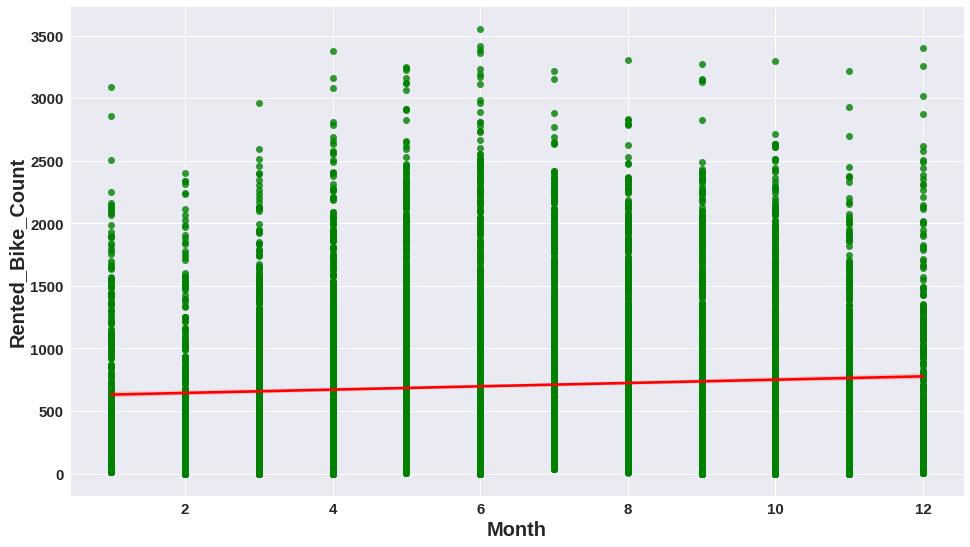

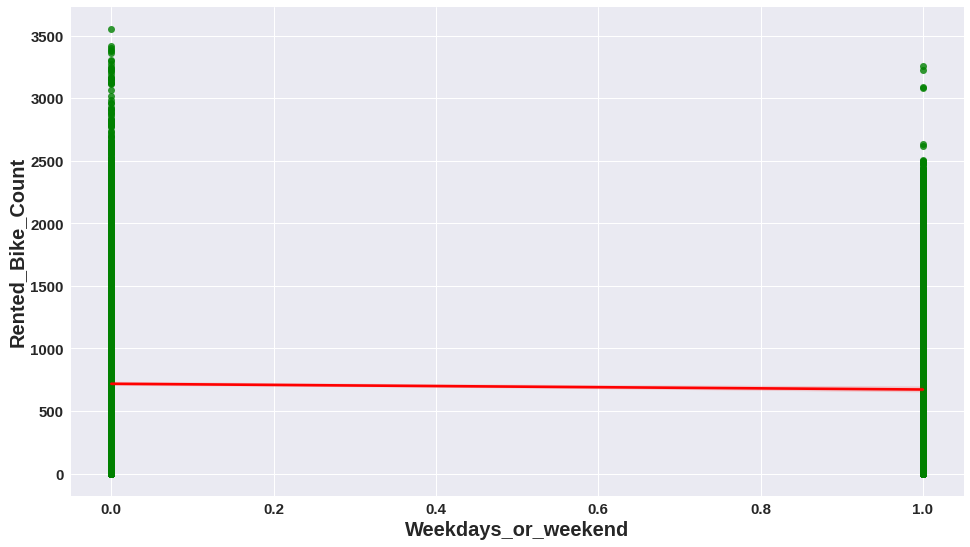

In [37]:
for col in numeric_col:

  plt.figure(figsize=(16,9))

  ax=fig.gca()

  sns.regplot(x=Bikeshare_df[col],y=Bikeshare_df['Rented_Bike_Count'],scatter_kws={'color':'g'},line_kws={'color':'r'})

  plt.show()

##**Hour**:
##1) We can say that, from morning 7 AM to Evening 7 PM we have good Bike Rent Count. and from 7 PM to 7 AM Bike Rent count starts declining.

##2)There is sudden peak between 6/7AM to 10 AM due to Office, College time. 

##3) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.


##**Temperature**:

##1) For decrease in temperature below 0 deg Celsius the bike rent count is significantly decreased because may be people don’t want to ride bike in such cold temperature.

##2) But for normal temperature the Bike rent count is very high.

##**Humidity**:

## Here its seems like humidity is inversely proportional to bike rent count. As humidity percentage is increasing there is decrease in bike rent count.

##**Visibility**:

##It's very obvious that as visibility increases the bike rent count also increases. Nobody would prefer to ride in low visibility.

##**Wind Speed**:
##Up to wind speed 4 m/s there is good bike rent count.

##**Solar radiation**:
##Here the amount of rented bikes is huge, when there is solar radiation.

##**Dew Point Temperature**:
##It's again the same case as of temperature. As dew temperature goes below 0 deg Celsius there is less bike rent count. It looks like Dew Point temperature and Temperature columns have strong collinearity.








#**Checking Corelation between Dependent and Independent variable.**

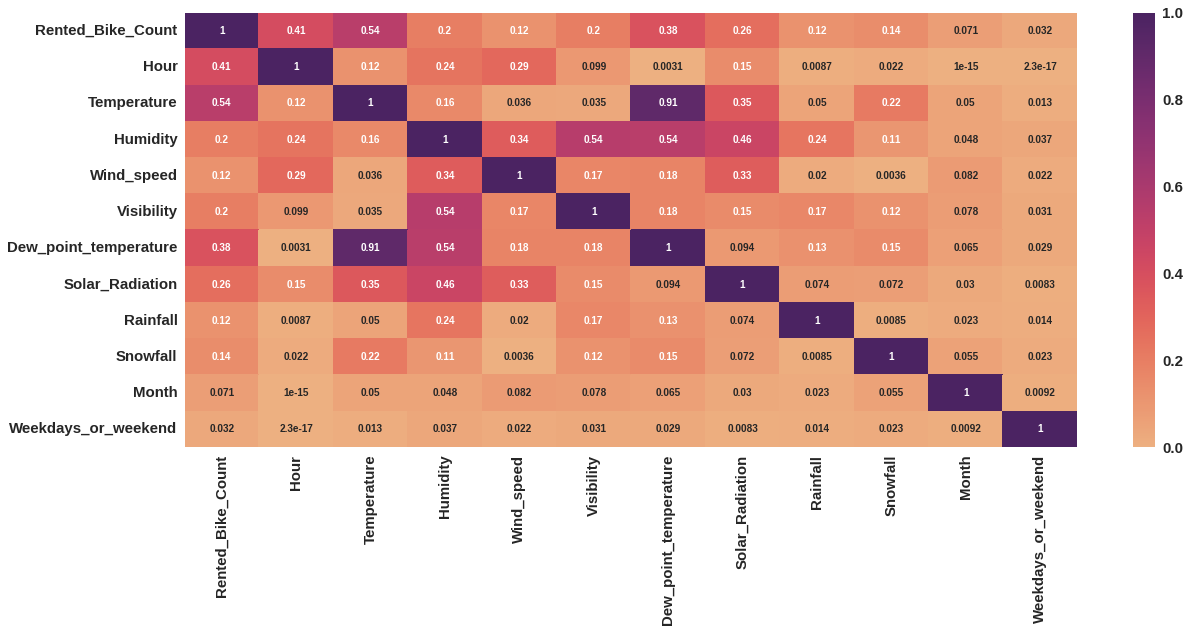

In [38]:
plt.figure(figsize=(20,8))

corr=Bikeshare_df.corr()

sns.heatmap(data=abs(corr),annot=True,cmap='flare')

plt.show()

##•	Temperature and Dew point Temperature are highly correlated.

##•	As per our regression assumption, there should not be collinearity between independent variables.

##•	We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them. As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.

##•	And also we dropping "Date" column as its not useful for us(as we have created the month, weekdays and weekend columns.



#**Modeling**

##**Lets prepare data for modeling**

In [39]:
# Make copy of dataset

bs=Bikeshare_df.copy()

In [40]:
bs.head(2)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  Month  Weekdays_or_weekend  
0  No Holiday             Yes      1                    0  
1  No Holiday             Yes      1                    0

In [41]:
# Since Temperature and Dew point temperature are corelated with each other. We will drop dew point temperature.

bs.drop('Dew_point_temperature',inplace=True,axis=1)

In [42]:
bs.head(2)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   

   Solar_Radiation  Rainfall  Snowfall Seasons     Holiday Functioning_Day  \
0              0.0       0.0       0.0  Winter  No Holiday             Yes   
1              0.0       0.0       0.0  Winter  No Holiday             Yes   

   Month  Weekdays_or_weekend  
0      1                    0  
1      1                    0

In [43]:
#Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [44]:
Calculate_vif(bs[[i for i in bs.describe().columns if i not in ['Rented_Bike_Count']]])

variables       VIF
0                 Hour  3.961874
1          Temperature  3.236809
2             Humidity  6.114153
3           Wind_speed  4.616621
4           Visibility  5.404128
5      Solar_Radiation  2.272068
6             Rainfall  1.081252
7             Snowfall  1.125304
8                Month  4.580307
9  Weekdays_or_weekend  1.399708

##**Humidity vif is greater than 5 so we will remove that column.**

In [45]:
Calculate_vif(bs[[i for i in bs.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

variables       VIF
0                 Hour  3.755736
1          Temperature  2.492225
2           Wind_speed  3.748534
3      Solar_Radiation  1.893823
4             Rainfall  1.030569
5             Snowfall  1.077566
6                Month  3.049391
7  Weekdays_or_weekend  1.350943

##**Now we have VIF values in the range of 1 to 5. we will drop 'Humidity','Visibility' this column from our dataset**

In [46]:
# As per above vif calculation dropping humidity and visibility columns.
bs.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [47]:
# checking categoiries in season column.

bs['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [48]:
# checking categoiries in holiday columns.

bs['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [49]:
# Createing dummy variables

bs=pd.get_dummies(bs,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [50]:
# Labeling for holiday=1 and no holiday=0

bs['Holiday']=bs['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [51]:
## Labeling for Yes=1 and No=0

bs['Functioning_Day']=bs['Functioning_Day'].map({'Yes':1, 'No':0})

In [52]:
# checking dummy and labled columns

bs.head(3)

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
0                254     0         -5.2         2.2              0.0   
1                204     1         -5.5         0.8              0.0   
2                173     2         -6.0         1.0              0.0   

   Rainfall  Snowfall  Holiday  Functioning_Day  Month  Weekdays_or_weekend  \
0       0.0       0.0        0                1      1                    0   
1       0.0       0.0        0                1      1                    0   
2       0.0       0.0        0                1      1                    0   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  
0               0               0               1  
1               0               0               1  
2               0               0               1

In [53]:
# final info before going for modeling

bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temperature          8760 non-null   float64
 3   Wind_speed           8760 non-null   float64
 4   Solar_Radiation      8760 non-null   float64
 5   Rainfall             8760 non-null   float64
 6   Snowfall             8760 non-null   float64
 7   Holiday              8760 non-null   int64  
 8   Functioning_Day      8760 non-null   int64  
 9   Month                8760 non-null   int64  
 10  Weekdays_or_weekend  8760 non-null   int64  
 11  Seasons_Spring       8760 non-null   uint8  
 12  Seasons_Summer       8760 non-null   uint8  
 13  Seasons_Winter       8760 non-null   uint8  
dtypes: float64(5), int64(6), uint8(3)
memory usage: 778.6 KB


#**Linear Regression**

In [54]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [55]:
# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)

X=bs.drop('Rented_Bike_Count',axis=1)

y=np.sqrt(bs['Rented_Bike_Count'])

In [56]:
# Split data into train test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Transforming data 

# Here if you don't apply scaling still, we will get almost similar results.

In [57]:
# for its a good practice to apply scaling to the linear regression models.

min_max_scaler = MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)

X_test = min_max_scaler.transform(X_test)

In [58]:
# Checking shape

print(X_train.shape)

print(y_train.shape)

print(X_test.shape)

print(y_test.shape)

(6132, 13)
(6132,)
(2628, 13)
(2628,)


In [59]:
# Taking instance

l_reg=LinearRegression()

# fitting the model and trainig

l_reg.fit(X_train,y_train)

LinearRegression()

In [60]:
# Cheeck coefficents

l_reg.coef_

array([ 13.03412526,  24.3956317 ,   3.35825273,   3.43510298,
       -71.13971093, -10.4763411 ,  -3.00551186,  28.47981875,
         1.05521935,  -0.58930031,  -2.93262797,  -3.58223659,
        -6.45886182])

In [61]:
# Get dataframe for x columns and coefficient

pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

Coefficient
Hour                   13.034125
Temperature            24.395632
Wind_speed              3.358253
Solar_Radiation         3.435103
Rainfall              -71.139711
Snowfall              -10.476341
Holiday                -3.005512
Functioning_Day        28.479819
Month                   1.055219
Weekdays_or_weekend    -0.589300
Seasons_Spring         -2.932628
Seasons_Summer         -3.582237
Seasons_Winter         -6.458862

In [62]:
# Check intercept

l_reg.intercept_

-21.47705344024816

In [63]:
#Checking score

l_reg.score(X_train,y_train)

0.6123528085603556

In [64]:
# Y peredictions on train data

y_pred_train=l_reg.predict(X_train)

# Y predictions on test data

y_pred=l_reg.predict(X_test)

# Evaluation of training data set

In [65]:
#Calculate Mean Absolute Error.

MAE= mean_absolute_error(y_train,y_pred_train)

print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error

MSE=mean_squared_error(y_train,y_pred_train)

print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error

RMSE=np.sqrt(MSE)

print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score

R2=r2_score(y_train,y_pred_train)

print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.8555397241788345.
The Mean Squred Error(MSE) is 60.29949292444555.
The Root Mean Squared Error(RMSE) is 7.765274813195316.
The R2 Score is 0.6123528085603556.


##Saving train data set results in data frame.

In [66]:
#Saving train data set results in dataframe.

train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [67]:
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.8555  60.2995  7.7653    0.6124

##**Evaluation of Test data set**

In [68]:
#Calculate Mean Absolute Error.

MAE= mean_absolute_error(y_test,y_pred)

print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error

MSE=mean_squared_error(y_test,y_pred)

print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error

RMSE=np.sqrt(MSE)

print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score

R2=r2_score(y_test,y_pred)

print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.834169822951748.
 The Mean Squred Error(MSE) is 58.624247223024895.
The Root Mean Squared Error(RMSE) is 7.656647257319936.
The R2 Score is 0.618326967365199.


In [69]:
# saving test result in dictionary.

test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [70]:
# create test_result dataframe

test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.8342  58.6242  7.6566    0.6183

## On testing data R2 score is 0.6183 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed. We need to improve our model performance.

In [71]:
# Define a fucntion to plot predicted y values and actual y values

def plot_Pred_vs_actual(y_pred,y_test):
  
  ''' Visualize predicted values with actaul values'''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [72]:
# Define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [73]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
 #Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit” 
def Residual_distPlot(y_pred,y_test):  
  '''Checks the distribution of residals)'''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x=y_test-y_pred)

  plt.title("Residual Distribution")

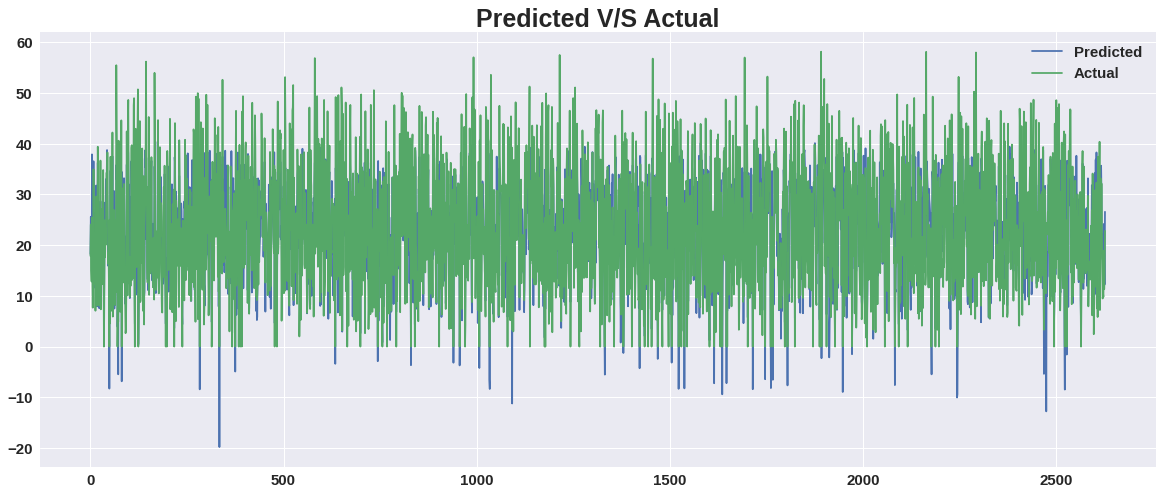

In [74]:
plot_Pred_vs_actual(y_pred,y_test)

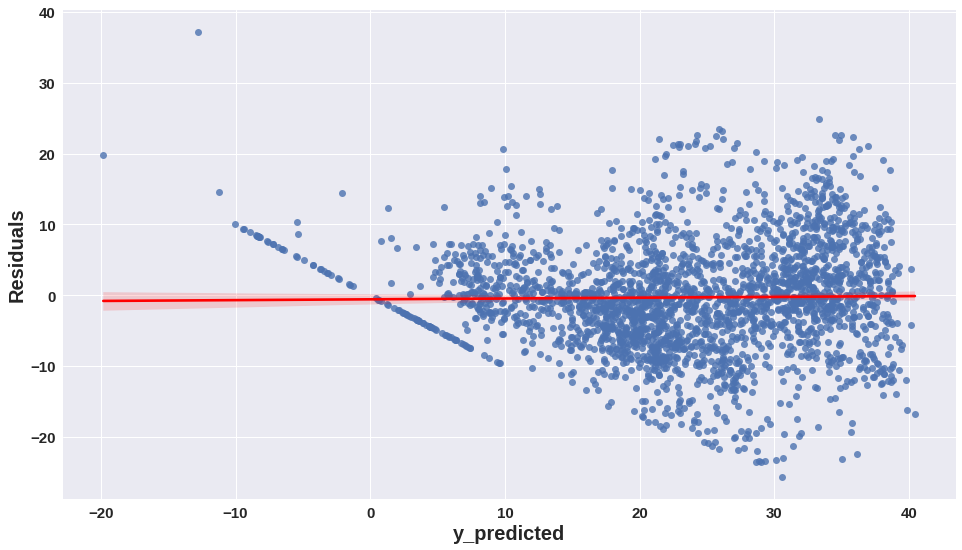

In [75]:
# Check Homoscedasticity by plotting y_predicted values and the residuals

plt.figure(figsize=(16,9))

sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'r'})

plt.ylabel('Residuals')

plt.xlabel('y_predicted')

plt.show()

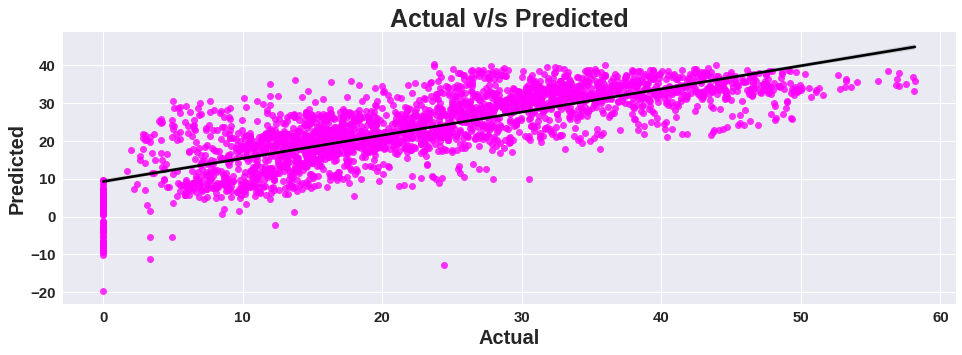

In [76]:
# Checking how predicted values and actual values are close  to the regression line

plot_scatter(y_pred,y_test)

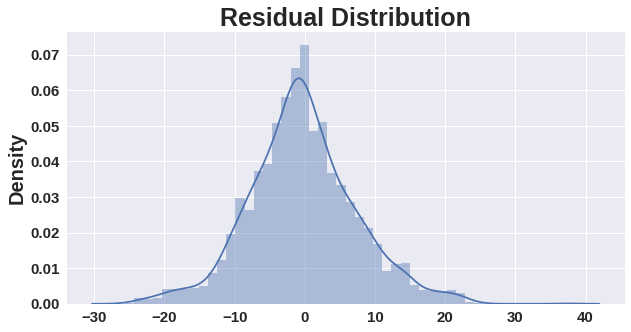

In [77]:
Residual_distPlot(y_pred,y_test)

#**Lasso Regression**

In [78]:
# instantiating
lasso_reg=Lasso(alpha=0.01)

In [79]:
# Fitting and training the model
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [80]:
# Check coefficient
lasso_reg.coef_

array([ 13.06618706,  23.53689635,   2.7511264 ,   3.64259929,
       -61.65707559,  -6.14969513,  -2.72395881,  27.99198566,
         0.97614536,  -0.51631491,  -2.73325777,  -3.18707888,
        -6.55141403])

In [81]:
# get dataframe of x columns and Coeficients
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients']).reset_index().rename(columns={'index':'X'})

X  Coeficients
0                  Hour    13.066187
1           Temperature    23.536896
2            Wind_speed     2.751126
3       Solar_Radiation     3.642599
4              Rainfall   -61.657076
5              Snowfall    -6.149695
6               Holiday    -2.723959
7       Functioning_Day    27.991986
8                 Month     0.976145
9   Weekdays_or_weekend    -0.516315
10       Seasons_Spring    -2.733258
11       Seasons_Summer    -3.187079
12       Seasons_Winter    -6.551414

In [82]:
# Check score on train dataset

lasso_reg.score(X_train,y_train)

0.6112950857219155

In [83]:
# Check score on test dataset

lasso_reg.score(X_test,y_test)

0.61723035952942

In [84]:
# Check intercept

lasso_reg.intercept_

-20.65131177706763

In [85]:
# Y prdiction on train data

y_pred_train=lasso_reg.predict(X_train)

# Y prdiction on test data

y_pred=lasso_reg.predict(X_test)

#**Evaluation On Train Data.**

In [86]:
#Calculate Mean Absolute Error.

MAE= mean_absolute_error(y_train,y_pred_train)

print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error

MSE=mean_squared_error(y_train,y_pred_train)

print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error

RMSE=np.sqrt(MSE)

print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score

R2=r2_score(y_train,y_pred_train)

print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.869103531726283.
The Mean Squred Error(MSE) is 60.46402436494349.
The Root Mean Squared Error(RMSE) is 7.775861647749624.
The R2 Score is 0.6112950857219155.


In [87]:
# Create train results dictionary

train_dict={'Model':"Lasoo",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [88]:
# appending train result to training result dataframe

traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.8555  60.2995  7.7653    0.6124
1              Lasoo  5.8691  60.4640  7.7759    0.6113

#**Evaluation On Test Data.**

In [89]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.850566426263689.
 The Mean Squred Error(MSE) is 58.792684087499225.
The Root Mean Squared Error(RMSE) is 7.667638755673042.
The R2 Score is 0.61723035952942.


In [90]:
# Create test results dictionary
test_dict={'Model':"Lasso",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [91]:
# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.8342  58.6242  7.6566    0.6183
1              Lasso  5.8506  58.7927  7.6676    0.6172

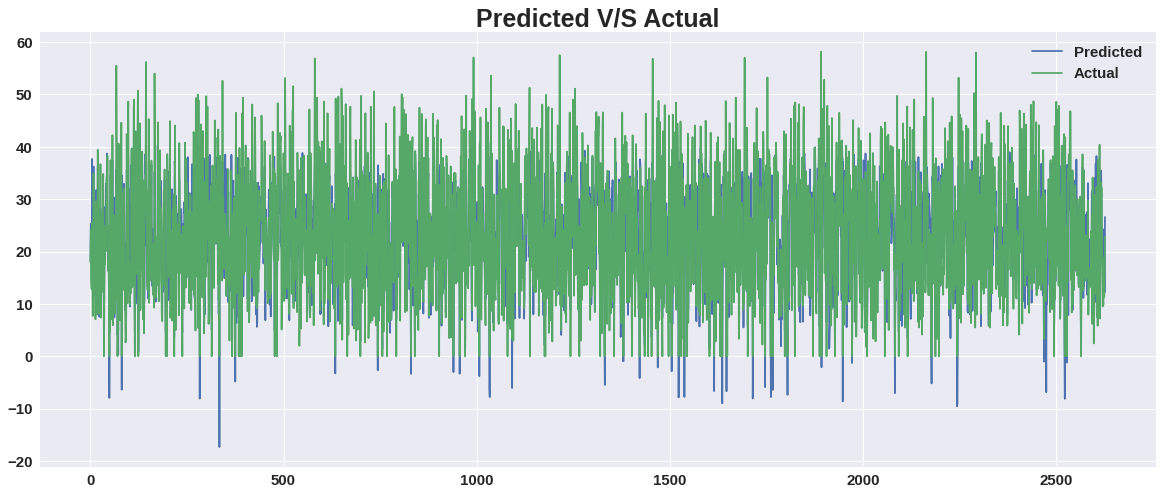

In [92]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'Y_predicted')

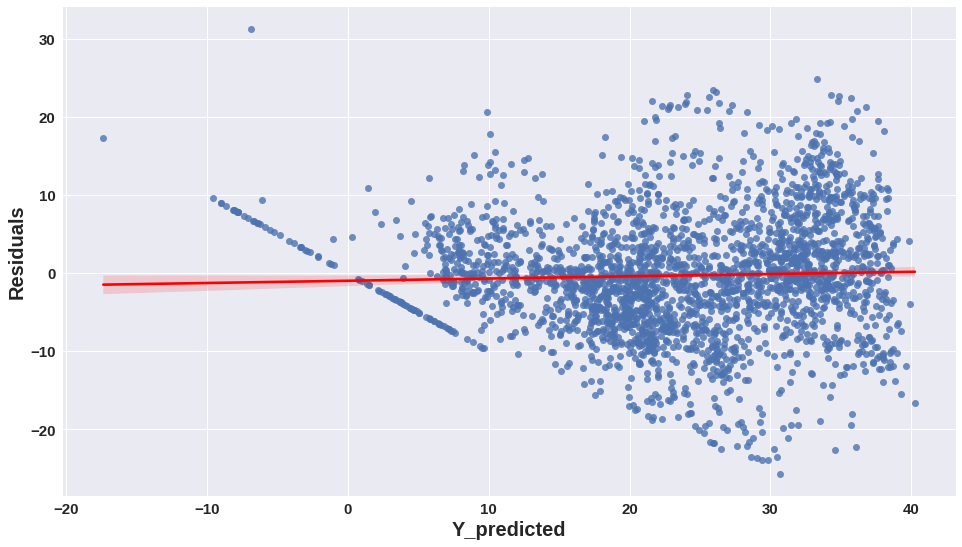

In [93]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,9))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'r'})
plt.ylabel('Residuals')
plt.xlabel('Y_predicted')

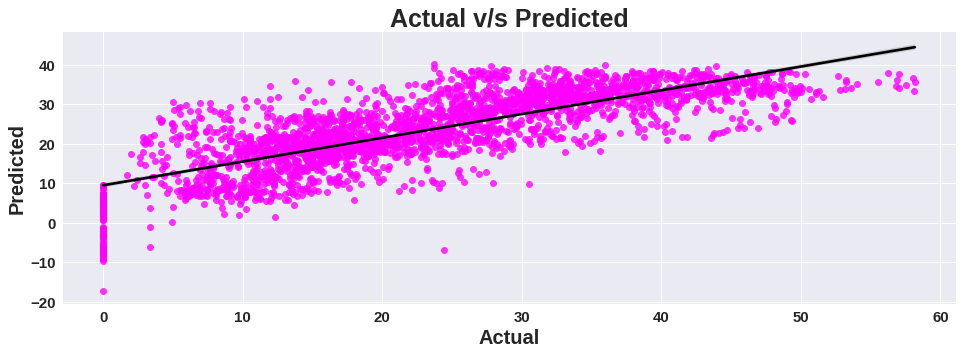

In [94]:
# Checking how predicted values and actual values are close  to the regression line

plot_scatter(y_pred,y_test)

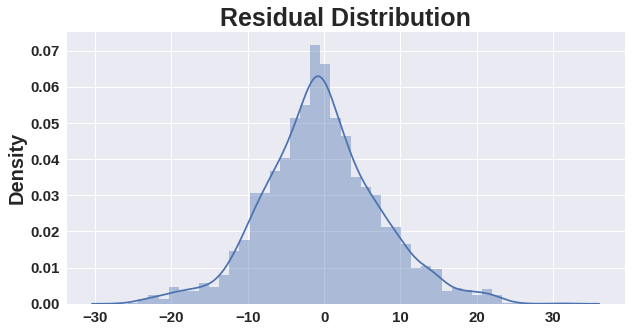

In [95]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

#**Ridge Regression**

In [96]:
# instantiating
ridge_lg=Ridge(alpha=0.1)
# fitting and training
ridge_lg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [97]:
# check coefficient
ridge_lg.coef_

array([ 13.03371786,  24.34582856,   3.34949793,   3.4576116 ,
       -70.04499364, -10.41205151,  -3.00303898,  28.46135581,
         1.05691503,  -0.58736967,  -2.9327985 ,  -3.57190574,
        -6.46665547])

In [98]:
# get dataframe for x columns and coeff
pd.DataFrame(ridge_lg.coef_,X.columns,columns=['Coefficients'])

Coefficients
Hour                    13.033718
Temperature             24.345829
Wind_speed               3.349498
Solar_Radiation          3.457612
Rainfall               -70.044994
Snowfall               -10.412052
Holiday                 -3.003039
Functioning_Day         28.461356
Month                    1.056915
Weekdays_or_weekend     -0.587370
Seasons_Spring          -2.932799
Seasons_Summer          -3.571906
Seasons_Winter          -6.466655

In [99]:
# Check intercept
ridge_lg.intercept_

-21.44118629409719

In [100]:
# Y predictions on training dataset
y_pred_train_ridge=ridge_lg.predict(X_train)
# Y predictions on test dataset
y_pred_ridge=ridge_lg.predict(X_test)

#**Evaluation On Train Data.**

In [101]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.869103531726283.
The Mean Squred Error(MSE) is 60.46402436494349.
The Root Mean Squared Error(RMSE) is 7.775861647749624.
The R2 Score is 0.6112950857219155.


In [102]:
train_dict={'Model':"Ridge GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [103]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0   Linear Regression  5.8555  60.2995  7.7653    0.6124
1               Lasoo  5.8691  60.4640  7.7759    0.6113
2  Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113

#**Evaluation On Test Data.**

In [104]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.850566426263689.
 The Mean Squred Error(MSE) is 58.792684087499225.
The Root Mean Squared Error(RMSE) is 7.667638755673042.
The R2 Score is 0.61723035952942.


In [105]:
test_dict={'Model':"Ridge(GridsearchCv Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [106]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0           Linear Regression  5.8342  58.6242  7.6566    0.6183
1                       Lasso  5.8506  58.7927  7.6676    0.6172
2  Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172

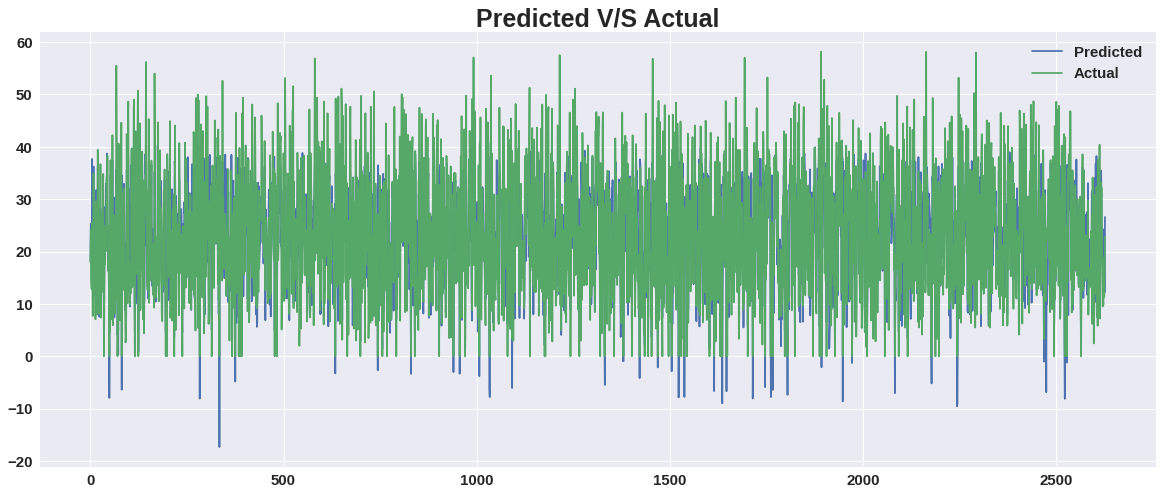

In [107]:
plot_Pred_vs_actual(y_pred,y_test)


Text(0.5, 0, 'Y_predicted')

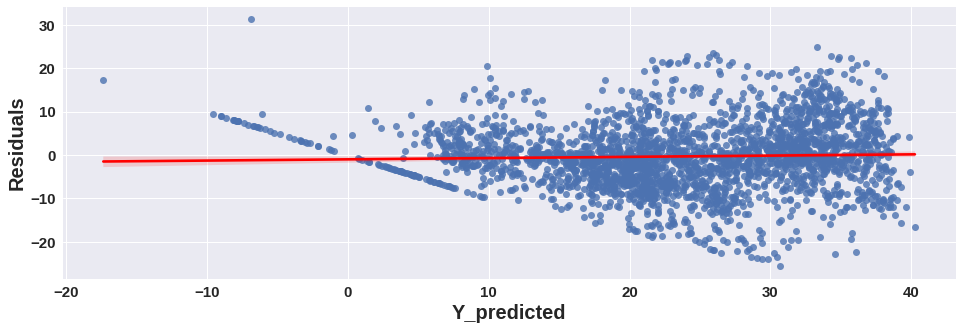

In [108]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'r'})
plt.ylabel('Residuals')
plt.xlabel('Y_predicted')

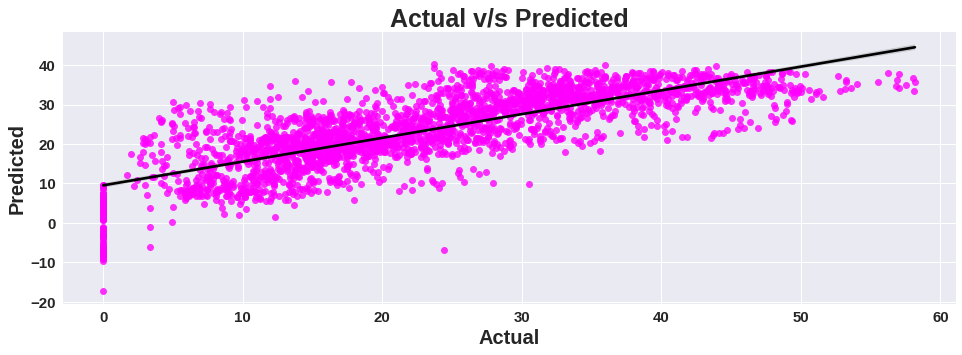

In [109]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

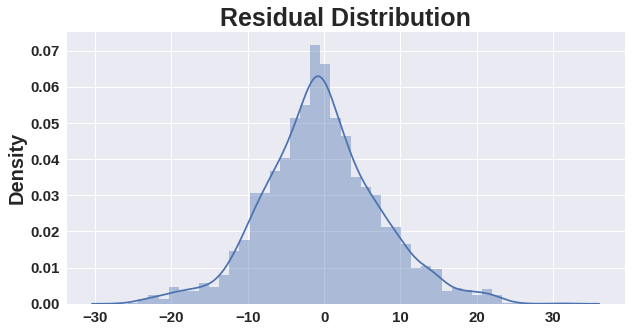

In [110]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

##**GreadSearchCV on Ridge**

In [111]:
# importing gridsearchcv for hyper parameter tuning
from sklearn.model_selection  import GridSearchCV

In [112]:
# cross validation on Ridge regression
# creating object
ridge_reg=Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_reg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

##**•	Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:**
##**•	α = 0: The objective becomes same as simple linear regression. We’ll get the same coefficients as simple linear regression.**
##**•	α = ∞: The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.**
##**•	0 < α < ∞: The magnitude of α will decide the weightage given to different parts of objective. The coefficients will be somewhere between 0 and ones for simple linear regression.**



In [113]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.

print(f'The best alpha value is {ridge_linear_reg.best_params_}')

print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -60.73715246759981


##**Best params are applied on the above ridge model. (Score on ridge is after hyperparameter tuning.)**



# **ElasticNet Regression**

In [114]:
# creating object of elastic net
elastic_net_reg=ElasticNet(alpha=0.001,l1_ratio=0.5)
elastic_net_reg.fit(X_train,y_train)

ElasticNet(alpha=0.001)

In [115]:
# Check score on train data
elastic_net_reg.score(X_train,y_train)

0.6084747377362095

In [116]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.6139867979293316

In [117]:
# predicting Y train values from train data set
y_pred_train=elastic_net_reg.predict(X_train)
# predicting y values from test data
y_pred=elastic_net_reg.predict(X_test)

## **Evaluation of training data set**

In [118]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.8932275545714745.
The Mean Squred Error(MSE) is 60.90273656811195.
The Root Mean Squared Error(RMSE) is 7.804020538678249.
The R2 Score is 0.6084747377362095.


In [119]:
train_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [120]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                Linear Regression  5.8555  60.2995  7.7653    0.6124
1                            Lasoo  5.8691  60.4640  7.7759    0.6113
2               Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3  ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085

##**Evaluation of Test data set**

In [121]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.871068266349744.
 The Mean Squred Error(MSE) is 59.2908889405223.
The Root Mean Squared Error(RMSE) is 7.700057723194178.
The R2 Score is 0.6139867979293316.


In [122]:
test_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [123]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                Linear Regression  5.8342  58.6242  7.6566    0.6183
1                            Lasso  5.8506  58.7927  7.6676    0.6172
2       Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3  ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140

In [124]:
# Cross validation

elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [125]:
# print best parameters and best score
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')


The best alpha value is {'alpha': 0.0001, 'l1_ratio': 0.5}
The best negative mean squred error value is -60.73201342564849


##**L1_ratio**

**Its range is 0 < = l1_ratio < = 1. If l1_ratio = 1, the penalty would be L1 penalty. If l1_ratio = 0, the penalty would be an L2 penalty. *If the value of l1 ratio is between 0 and 1, the penalty would be the combination of L1 and L2.**

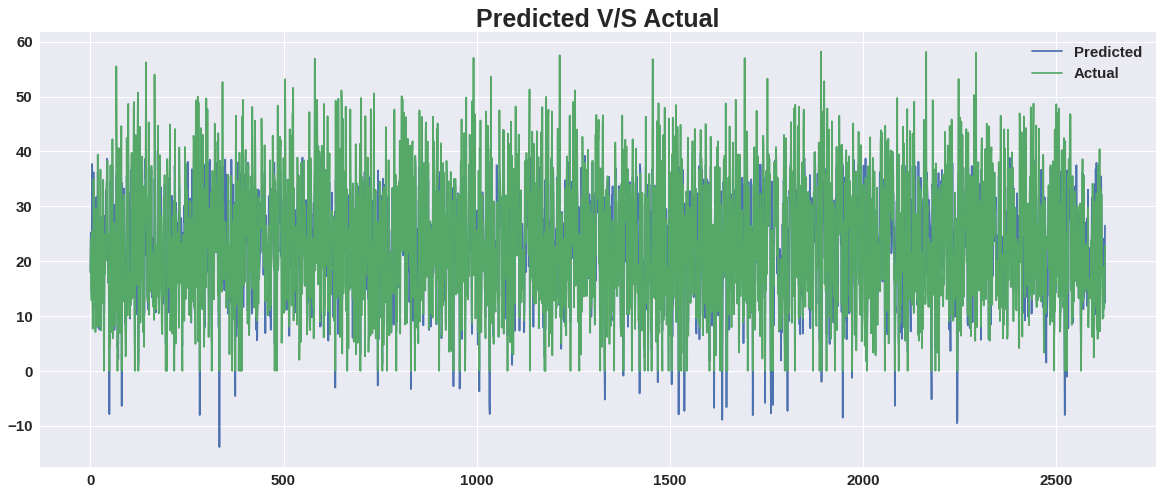

In [126]:
# plotting predicted v/s actual
plot_Pred_vs_actual(y_pred,y_test)

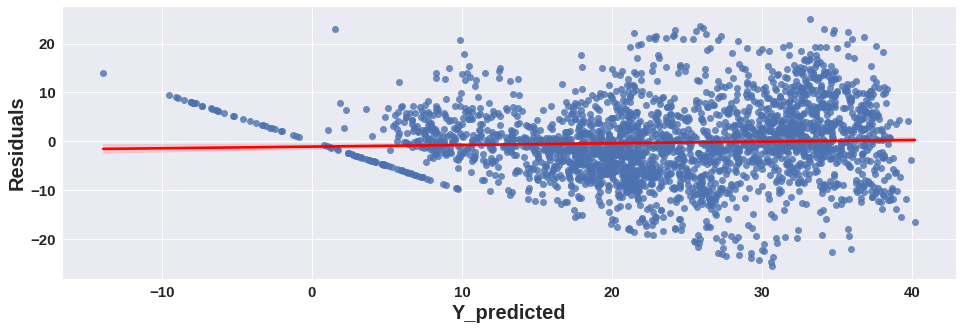

In [127]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'r'})
plt.ylabel('Residuals')
plt.xlabel('Y_predicted')
plt.show()

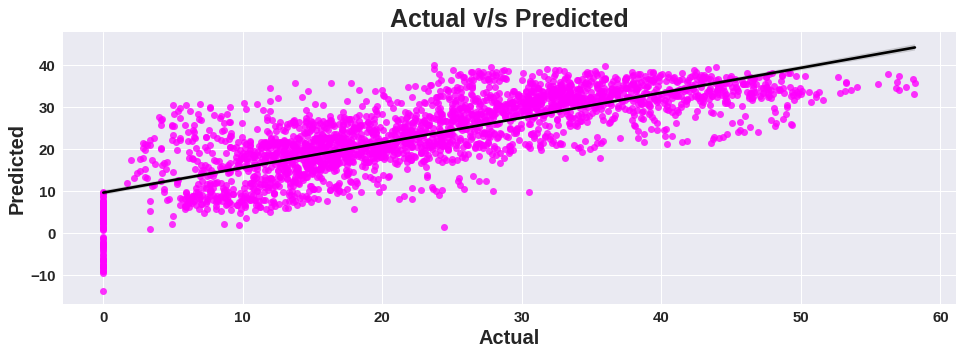

In [128]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

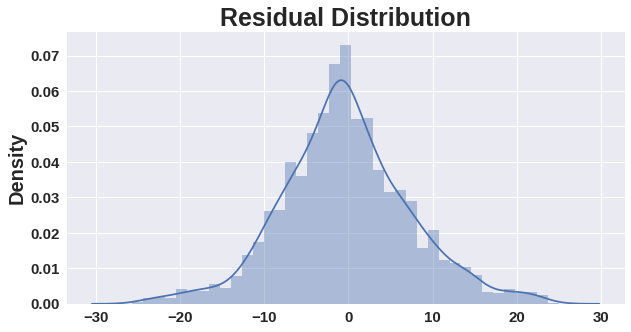

In [129]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

#**Decision Tree Regression**

In [130]:
#import decsion tree packages
from sklearn.tree import DecisionTreeRegressor

# create an object
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')

# fitting Xtrain yTrain
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [131]:
# Check score on Train dataset
D_tree.score(X_train,y_train)

0.8814250872495163

In [132]:
# check score on Test dataset.
D_tree.score(X_test,y_test)

0.8379989775706862

In [133]:
#  predicting y_train_predictions from  X train values
y_pred_train=D_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred=D_tree.predict(X_test)

## **Evaluation of training data set**

In [134]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 2.8855165215690715.
The Mean Squred Error(MSE) is 18.44462508772692.
The Root Mean Squared Error(RMSE) is 4.294720606480347.
The R2 Score is 0.8814250872495163.


In [135]:
# creating dictionary  of Decison tree results( Train dataset)
train_dict={'Model':"Decision Tree Regressor-GridSearchCV",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [136]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3       ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085
4  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814

## **Evaluation of Test data set**

In [137]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 3.4014904048260592.
 The Mean Squred Error(MSE) is 24.883046946536975.
The Root Mean Squared Error(RMSE) is 4.988290984549415.
The R2 Score is 0.8379989775706862.


In [138]:
test_dict={'Model':"Decision Tree Regressor(GridsearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

In [139]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.4015  24.8830  4.9883    0.8380

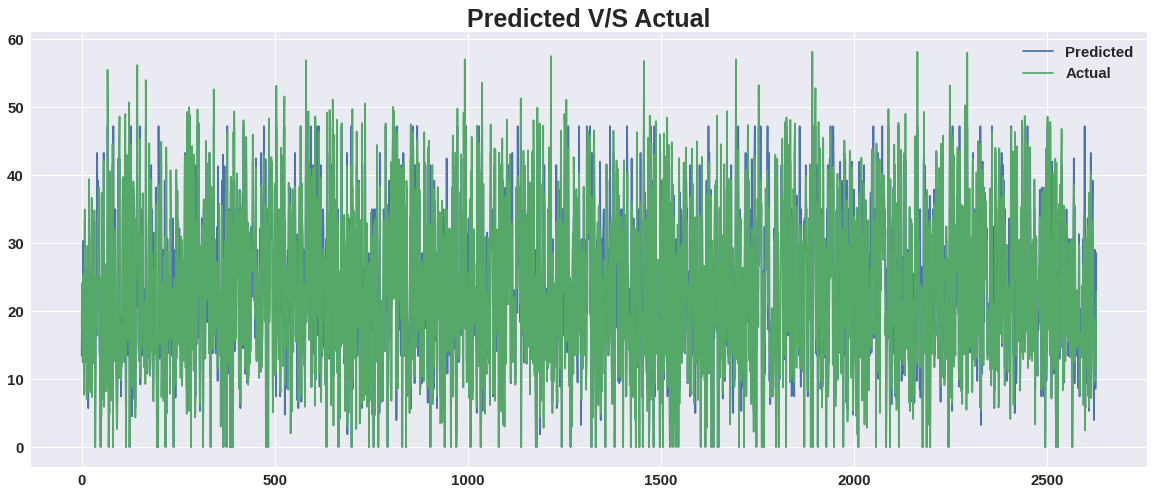

In [140]:
plot_Pred_vs_actual(y_pred,y_test)


Text(0.5, 0, 'Y_predicted')

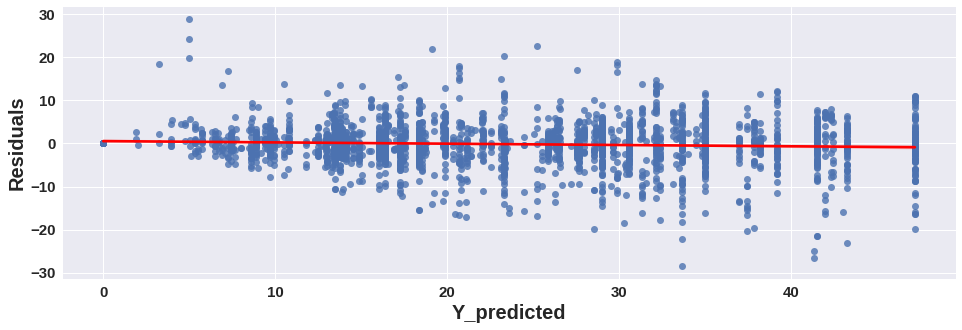

In [141]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'r'})
plt.ylabel('Residuals')
plt.xlabel('Y_predicted')

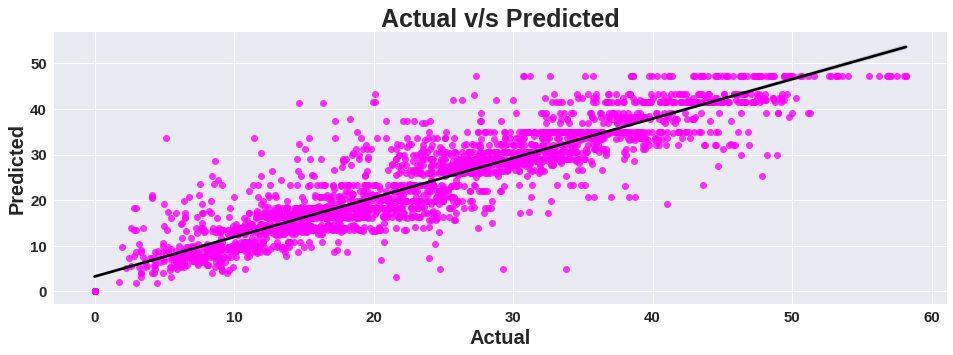

In [142]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

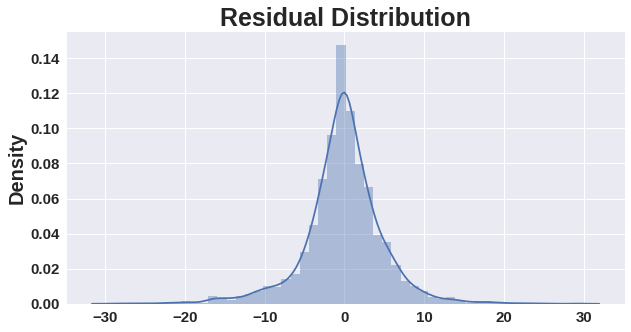

In [143]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

# **Hyperparameter Tuning**

In [144]:
# Hyper parameters range intialization for tuning 
tree=DecisionTreeRegressor()
parameters={'criterion': ["mae"],
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,None],
           "max_features":["auto","log2"] }

In [145]:
tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mae'], 'max_depth': [3, 5, 7, 9, None],
                         'max_features': ['auto', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [146]:
tuning_model.best_params_

{'criterion': 'mae',
 'max_depth': 9,
 'max_features': 'auto',
 'splitter': 'best'}

In [147]:
D_tree=DecisionTreeRegressor(max_depth=9,max_features='auto',splitter='best')
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

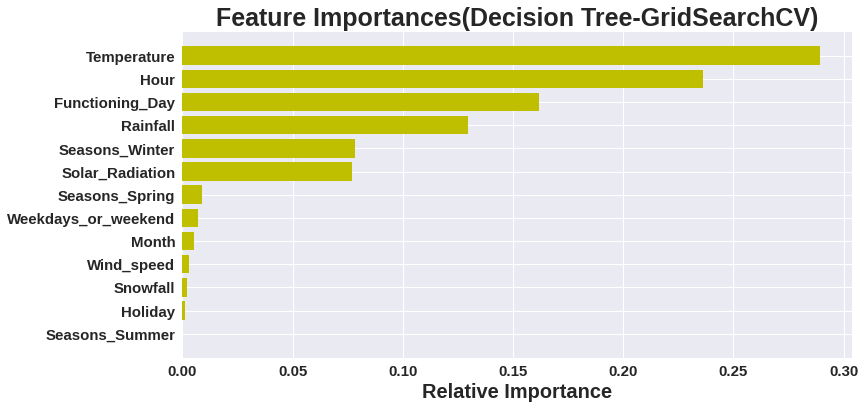

In [148]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')
plt.show()

##**We have applied this best parametrs to above Decsion tree regressor model**

#**Random Forest Regression**

In [149]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [150]:
rf.score(X_train,y_train)

0.9858174583562401

In [151]:
rf.score(X_test,y_test)

0.9063486722823051

In [152]:
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)

##**Evaluation of training data set**

In [153]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 0.9459896673846641.
The Mean Squred Error(MSE) is 2.20612992531304.
The Root Mean Squared Error(RMSE) is 1.4853046574063653.
The R2 Score is 0.9858174583562401.


In [154]:
train_dict={'Model':"Random Forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


In [155]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3       ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085
4  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814
5                         Random Forest  0.9460   2.2061  1.4853    0.9858

##**Evaluation of Test data set**

In [156]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.4941192620174153.
 The Mean Squred Error(MSE) is 14.38466467223513.
The Root Mean Squared Error(RMSE) is 3.7927120471023277.
The R2 Score is 0.9063486722823051.


In [157]:
test_dict={'Model':"Radom forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




In [158]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.4015  24.8830  4.9883    0.8380
5                           Radom forest  2.4941  14.3847  3.7927    0.9063

##**GridSearchCV On random Forest**

In [159]:
param={'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [160]:
rf_reg=RandomForestRegressor()
rf_tuning=GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [25, 50, 40, 80, 100]},
             scoring='neg_mean_squared_error')

In [161]:
rf_tuning.best_params_

{'max_depth': 9, 'n_estimators': 50}

In [162]:
rf=RandomForestRegressor(max_depth=9,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=9)

In [163]:
rf.score(X_train,y_train)

0.903961888041197

In [164]:
rf.score(X_test,y_test)

0.8778301827148038

In [165]:
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)

##**Evaluation of training data set**

In [166]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 2.6271838790274344.
The Mean Squred Error(MSE) is 14.938969197816562.
The Root Mean Squared Error(RMSE) is 3.865096272774659.
The R2 Score is 0.903961888041197.


In [167]:
train_dict={'Model':"Random Forest-GridSearchCv",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


In [168]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3       ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085
4  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814
5                         Random Forest  0.9460   2.2061  1.4853    0.9858
6            Random Forest-GridSearchCv  2.6272  14.9390  3.8651    0.9040

In [169]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.9535129705209164.
 The Mean Squred Error(MSE) is 18.765050080371005.
The Root Mean Squared Error(RMSE) is 4.331864503925648.
The R2 Score is 0.8778301827148038.


In [170]:
test_dict={'Model':"Random Forest-GridSearchCv",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.4015  24.8830  4.9883    0.8380
5                           Radom forest  2.4941  14.3847  3.7927    0.9063
6             Random Forest-GridSearchCv  2.9535  18.7651  4.3319    0.8778

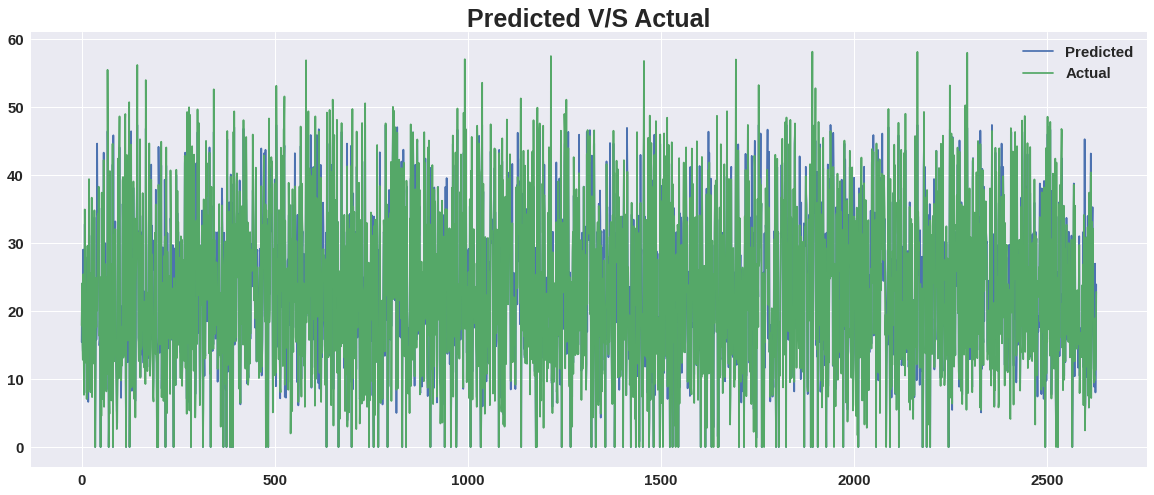

In [171]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'Y_predicted')

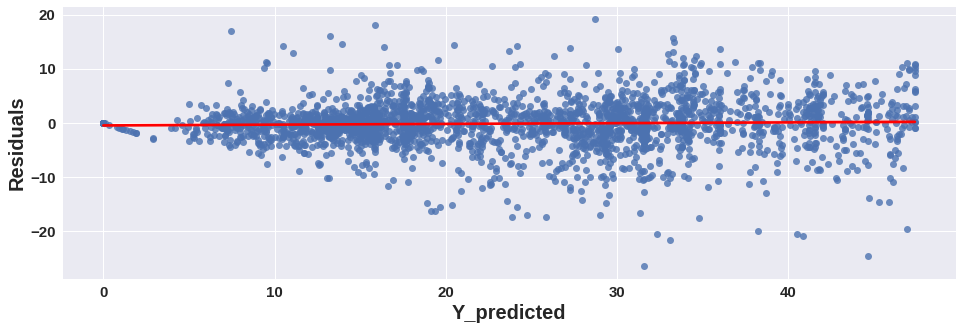

In [172]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'r'})
plt.ylabel('Residuals')
plt.xlabel('Y_predicted')

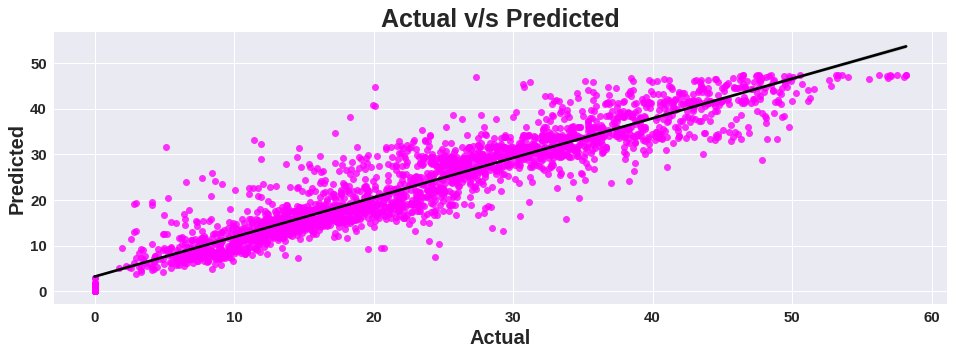

In [173]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

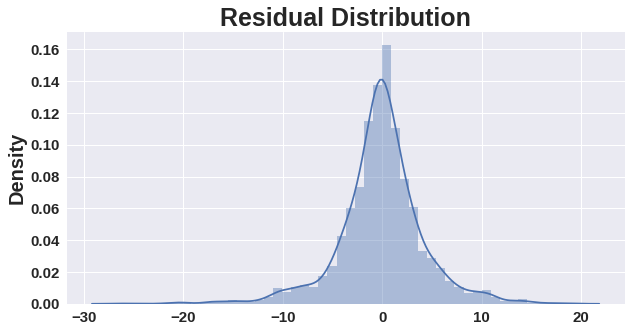

In [174]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

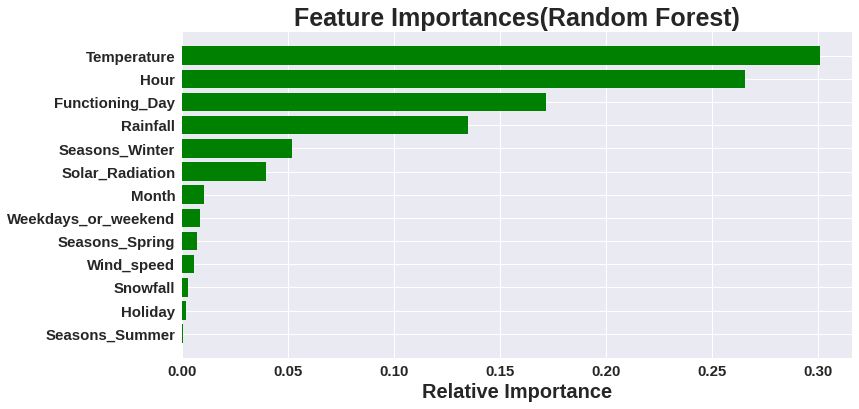

In [175]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')
plt.show()

##**By looking at the graph we can say that temperature and hours plays very important role on bike rentals.**

#**Gradient Boosting Regression**

In [176]:
from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [177]:
gradboo_reg.score(X_train,y_train)

0.86803340650971

In [178]:
gradboo_reg.score(X_test,y_test)

0.8588388936929272

In [179]:
y_pred_train=gradboo_reg.predict(X_train)
y_pred=gradboo_reg.predict(X_test)

In [180]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 3.1772012244215926.
The Mean Squred Error(MSE) is 20.527734615794035.
The Root Mean Squared Error(RMSE) is 4.530754309802512.
The R2 Score is 0.86803340650971.


In [181]:
train_dict={'Model':"Gardient boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  R2_score
0                     Linear Regression  5.8555  60.2995  7.7653    0.6124
1                                 Lasoo  5.8691  60.4640  7.7759    0.6113
2                    Ridge GridSearchCV  5.8691  60.4640  7.7759    0.6113
3       ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040    0.6085
4  Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947    0.8814
5                         Random Forest  0.9460   2.2061  1.4853    0.9858
6            Random Forest-GridSearchCv  2.6272  14.9390  3.8651    0.9040
7          Gardient boosting Regression  3.1772  20.5277  4.5308    0.8680

##**Evaluation of Test data set**

In [182]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 3.2843276453137245.
 The Mean Squred Error(MSE) is 21.682075721445603.
The Root Mean Squared Error(RMSE) is 4.656401585070343.
The R2 Score is 0.8588388936929272.


In [183]:
test_dict={'Model':"Gradient Boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




In [184]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  R2_score
0                      Linear Regression  5.8342  58.6242  7.6566    0.6183
1                                  Lasso  5.8506  58.7927  7.6676    0.6172
2             Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676    0.6172
3        ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001    0.6140
4  Decision Tree Regressor(GridsearchCV)  3.4015  24.8830  4.9883    0.8380
5                           Radom forest  2.4941  14.3847  3.7927    0.9063
6             Random Forest-GridSearchCv  2.9535  18.7651  4.3319    0.8778
7           Gradient Boosting Regression  3.2843  21.6821  4.6564    0.8588

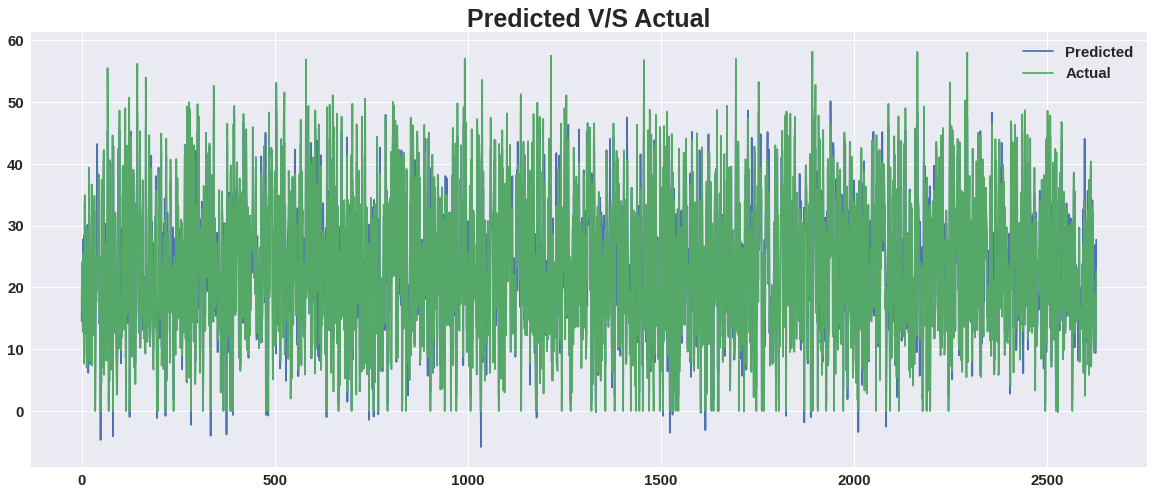

In [185]:
plot_Pred_vs_actual(y_pred,y_test)

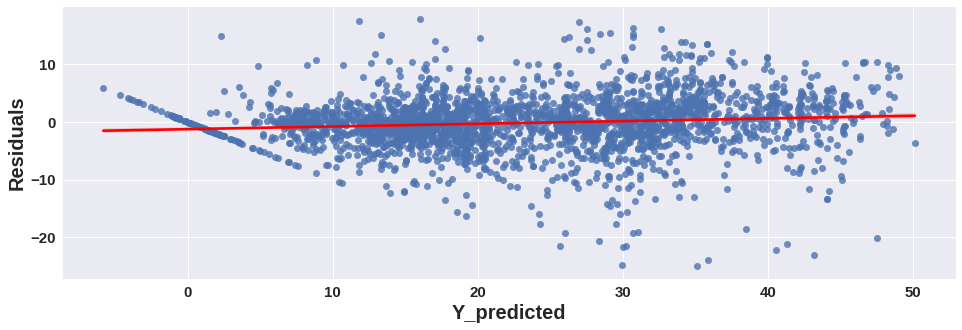

In [186]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'r'})
plt.ylabel('Residuals')
plt.xlabel('Y_predicted')
plt.show()

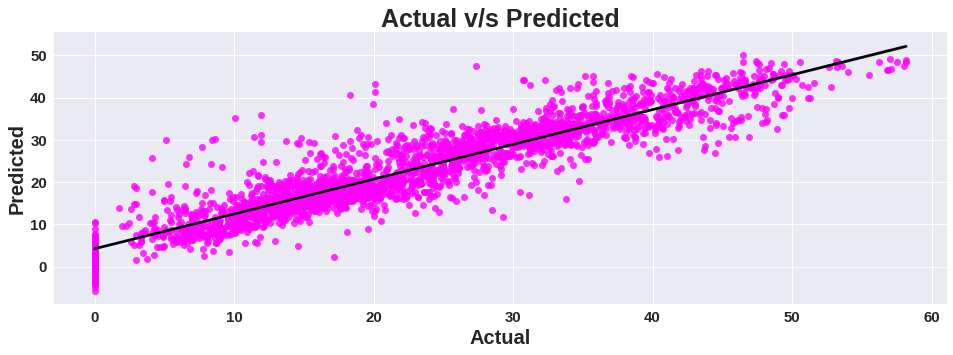

In [187]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

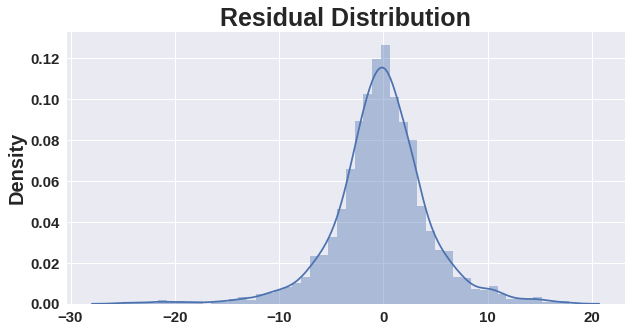

In [188]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

#**GridSearchCV on Gradient Boosting Regression**

In [189]:
gbr=GradientBoostingRegressor()

In [190]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,80,100,150],
                  'max_depth'    : [4,6,8,10]
                 }


In [191]:
#Gridsearch
grad_boo_tuning=GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
# fitting gridsearc on xtrain and ytrain
grad_boo_tuning.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 80, 100, 150],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [192]:
# get best paramters to use
grad_boo_tuning.best_params_

{'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9}

In [193]:
# USing best paramters tunned by GridsearchCv 
gradboo_tuned=GradientBoostingRegressor(learning_rate=0.04,max_depth=8,n_estimators=150,subsample=0.9)
gradboo_tuned.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=8, n_estimators=150,
                          subsample=0.9)

In [194]:
# checking score on train data
gradboo_tuned.score(X_train,y_train)

0.968994669703675

In [195]:
#checking score on test data
gradboo_tuned.score(X_test,y_test)

0.9149558694840809

In [196]:
# predicting y values of train and test data.

#  y preidictions on train data.

y_pred_train=gradboo_tuned.predict(X_train)

# y predictions on test data

y_pred=gradboo_tuned.predict(X_test)

##**Evaluation of training data set**

In [197]:
#Calculate Mean Absolute Error

MAE= mean_absolute_error(y_train,y_pred_train)

print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 1.514857965892831.
The Mean Squred Error(MSE) is 4.822956895108675.
The Root Mean Squared Error(RMSE) is 2.1961231511708705.
The R2 Score is 0.968994669703675.


In [198]:
train_dict={'Model':"Gradient Boosting Regression(GridSearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

Model     MAE      MSE    RMSE  \
0                           Linear Regression  5.8555  60.2995  7.7653   
1                                       Lasoo  5.8691  60.4640  7.7759   
2                          Ridge GridSearchCV  5.8691  60.4640  7.7759   
3             ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027  7.8040   
4        Decision Tree Regressor-GridSearchCV  2.8855  18.4446  4.2947   
5                               Random Forest  0.9460   2.2061  1.4853   
6                  Random Forest-GridSearchCv  2.6272  14.9390  3.8651   
7                Gardient boosting Regression  3.1772  20.5277  4.5308   
8  Gradient Boosting Regression(GridSearchCV)  1.5149   4.8230  2.1961   

   R2_score  
0    0.6124  
1    0.6113  
2    0.6113  
3    0.6085  
4    0.8814  
5    0.9858  
6    0.9040  
7    0.8680  
8    0.9690

##**Evaluation of Test data set**

In [199]:
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.370095636493905.
 The Mean Squred Error(MSE) is 13.062615657739927.
The Root Mean Squared Error(RMSE) is 3.6142240740911356.
The R2 Score is 0.9149558694840809.


In [200]:
test_dict={'Model':"Gradient Boosting Regression(GridSearchCV)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




In [201]:
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

Model     MAE      MSE    RMSE  \
0                           Linear Regression  5.8342  58.6242  7.6566   
1                                       Lasso  5.8506  58.7927  7.6676   
2                  Ridge(GridsearchCv Tunned)  5.8506  58.7927  7.6676   
3             ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909  7.7001   
4       Decision Tree Regressor(GridsearchCV)  3.4015  24.8830  4.9883   
5                                Radom forest  2.4941  14.3847  3.7927   
6                  Random Forest-GridSearchCv  2.9535  18.7651  4.3319   
7                Gradient Boosting Regression  3.2843  21.6821  4.6564   
8  Gradient Boosting Regression(GridSearchCV)  2.3701  13.0626  3.6142   

   R2_score  
0    0.6183  
1    0.6172  
2    0.6172  
3    0.6140  
4    0.8380  
5    0.9063  
6    0.8778  
7    0.8588  
8    0.9150

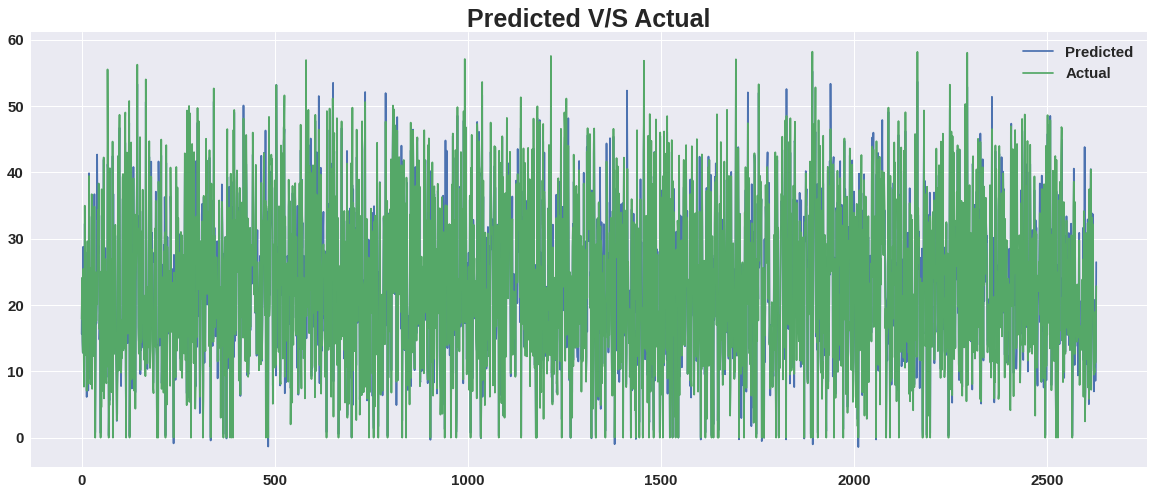

In [202]:
plot_Pred_vs_actual(y_pred,y_test)


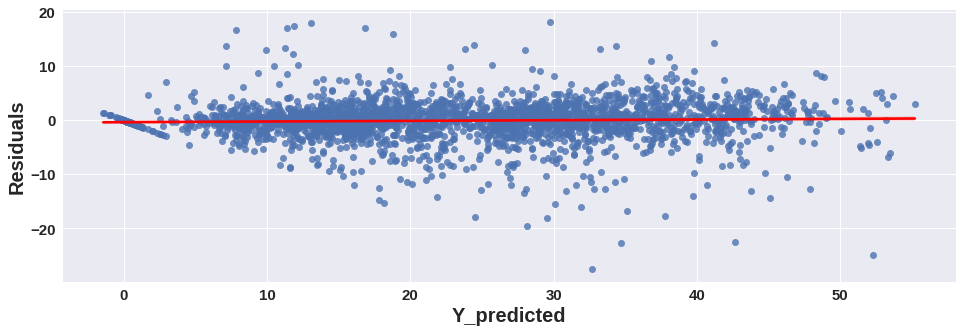

In [203]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'r'})
plt.ylabel('Residuals')
plt.xlabel('Y_predicted')
plt.show()

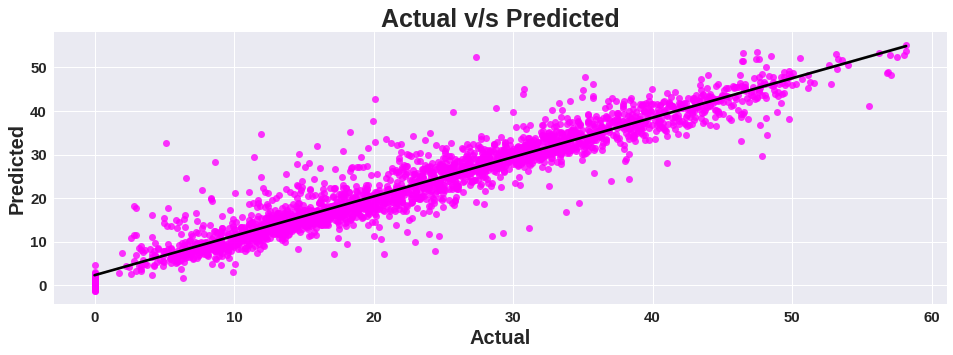

In [204]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

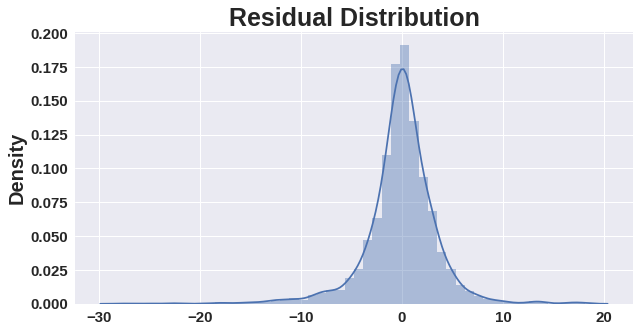

In [205]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)

Residual_distPlot(y_pred,y_test)

###**Here we got very nice bell shaped curve of the residuals.**

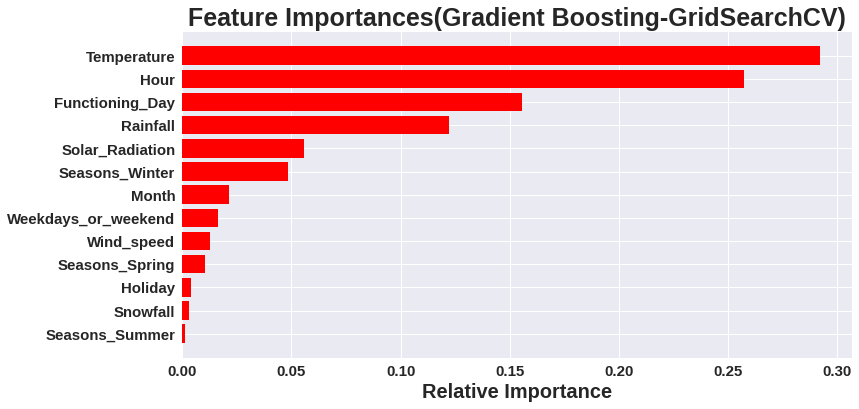

In [206]:
# checking Feature imporatance
imp_variables=X.columns
importances = gradboo_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')
plt.show()

In [207]:
# Check Final dataframe of All models
final_result=pd.concat([traing_results_df,test_results_df],keys=['Training set','Test set'])
final_result

Model     MAE      MSE  \
Training set 0                           Linear Regression  5.8555  60.2995   
             1                                       Lasoo  5.8691  60.4640   
             2                          Ridge GridSearchCV  5.8691  60.4640   
             3             ElasticNet(GridSearchCV-Tunned)  5.8932  60.9027   
             4        Decision Tree Regressor-GridSearchCV  2.8855  18.4446   
             5                               Random Forest  0.9460   2.2061   
             6                  Random Forest-GridSearchCv  2.6272  14.9390   
             7                Gardient boosting Regression  3.1772  20.5277   
             8  Gradient Boosting Regression(GridSearchCV)  1.5149   4.8230   
Test set     0                           Linear Regression  5.8342  58.6242   
             1                                       Lasso  5.8506  58.7927   
             2                  Ridge(GridsearchCv Tunned)  5.8506  58.7927   
             3             ElasticNet(GridSearchCV-Tunned)  5.8711  59.2909   
             4       Decision Tree Regressor(GridsearchCV)  3.4015  24.8830   
             5                                Radom forest  2.4941  14.3847   
             6                  Random Forest-GridSearchCv  2.9535  18.7651   
             7                Gradient Boosting Regression  3.2843  21.6821   
             8  Gradient Boosting Regression(GridSearchCV)  2.3701  13.0626   

                  RMSE  R2_score  
Training set 0  7.7653    0.6124  
             1  7.7759    0.6113  
             2  7.7759    0.6113  
             3  7.8040    0.6085  
             4  4.2947    0.8814  
             5  1.4853    0.9858  
             6  3.8651    0.9040  
             7  4.5308    0.8680  
             8  2.1961    0.9690  
Test set     0  7.6566    0.6183  
             1  7.6676    0.6172  
             2  7.6676    0.6172  
             3  7.7001    0.6140  
             4  4.9883    0.8380  
             5  3.7927    0.9063  
             6  4.3319    0.8778  
             7  4.6564    0.8588  
             8  3.6142    0.9150

#**Conclusions**:

## As we have calculated MAE,MSE,RMSE and R2 score for each model. Based on r2 score will decide our model performance.

## Our assumption: if the differnece of R2 score between Train data and Test is more than 5 % we will consider it as overfitting.

#**Linear,Lasso,Ridge and ElasticNet**:

##**From The above data frame, we can see that linear,Lasso,Ridge and Elastic regression models have almost similar R2 scores(61%) on both training and test data.(Even after using GridserachCV we have got similar results as of base models).**

#**Decision Tree Regressor**:

##**On Decision tree regressor model, without hyperparameter tuning we got r2 score as 100% on training data and on test data it was very less. Thus our model memorised the data.So it was a overfitted model.**

##**After hyperparameter tuning we got r2 score as 88% on training data and 83% on test data which is quite good for us.**

#**Random Forest:**

## **On Random Forest regressor model, without hyperparameter tuning we got r2 score as 98% on training data and 90% on test data. Thus our model memorised the data.So it was a overfitted model, as per our assumption**

## **After hyperparameter tuning we got r2 score as 90% on training data and 87% on test data which is very good for us.**



 # **Gradient Boosting Regression(Gradient Boosting Machine):**



## **On Random Forest regressor model, without hyperparameter tuning we got r2 score as 86% on training data and 85% on test data.Our model performed well without hyperparameter tuning.**

## **After hyperparameter tuning we got r2 score as 96% on training data and 91% on test data,thus we improved the model performance by hyperparameter tuning.**

## **Thus Gradient Boosting Regression(GridSearchCV) and Random forest(gridSearchCv) gives good r2 scores. We can deploy these models.**

#**In terms of features, Temperature and Hours plays very important role in following 3 models. Other features importances are different in 3 models.**

![image.png]()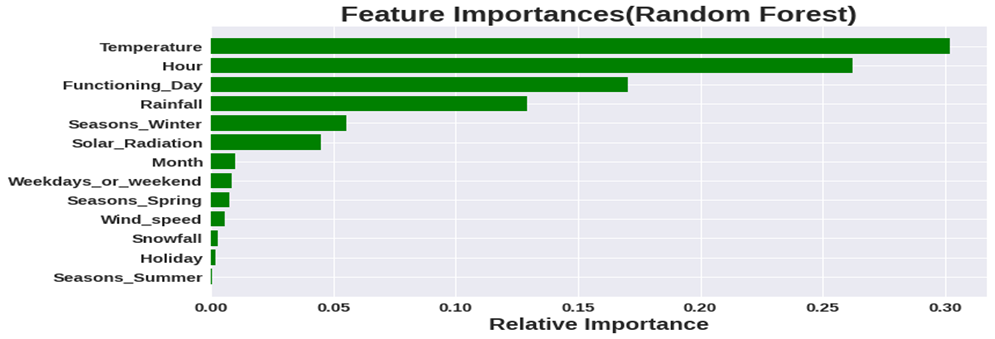

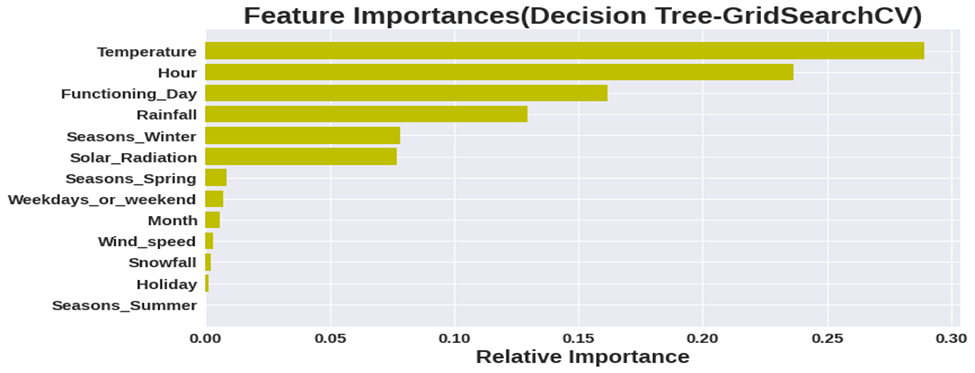

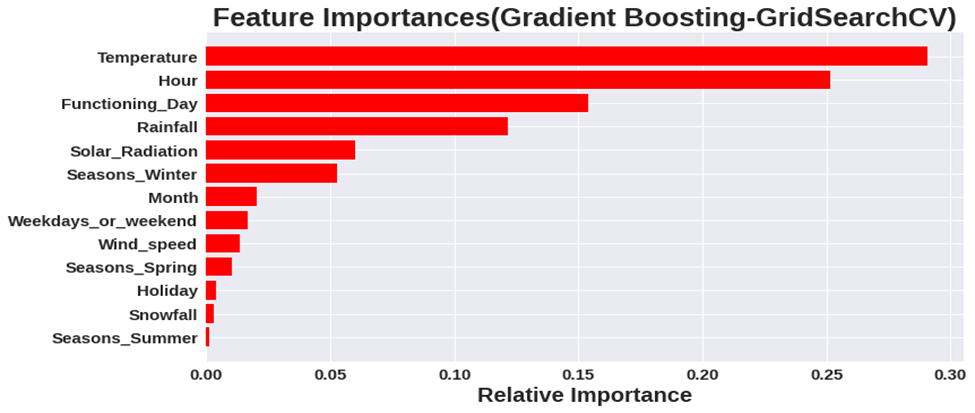